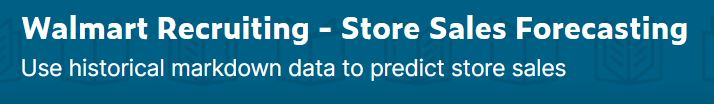

<h1><b>Description</b></h1>

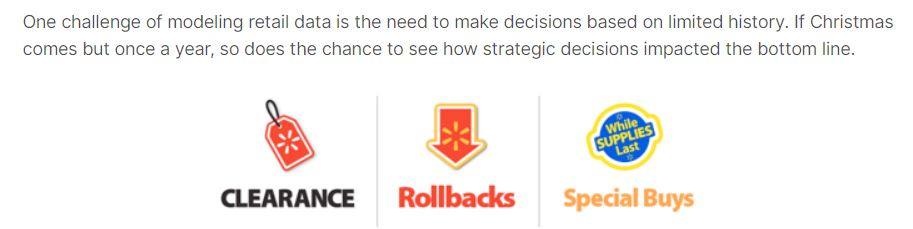

<h1><b>Real World Problem </b></h1>

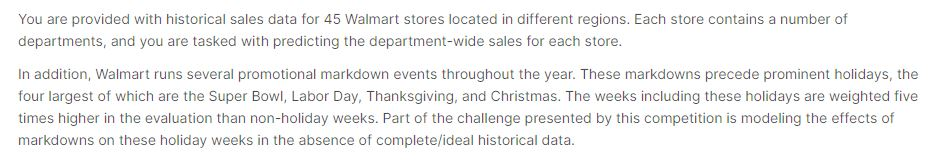

<h1><b> Dataset Schema </b></h1>

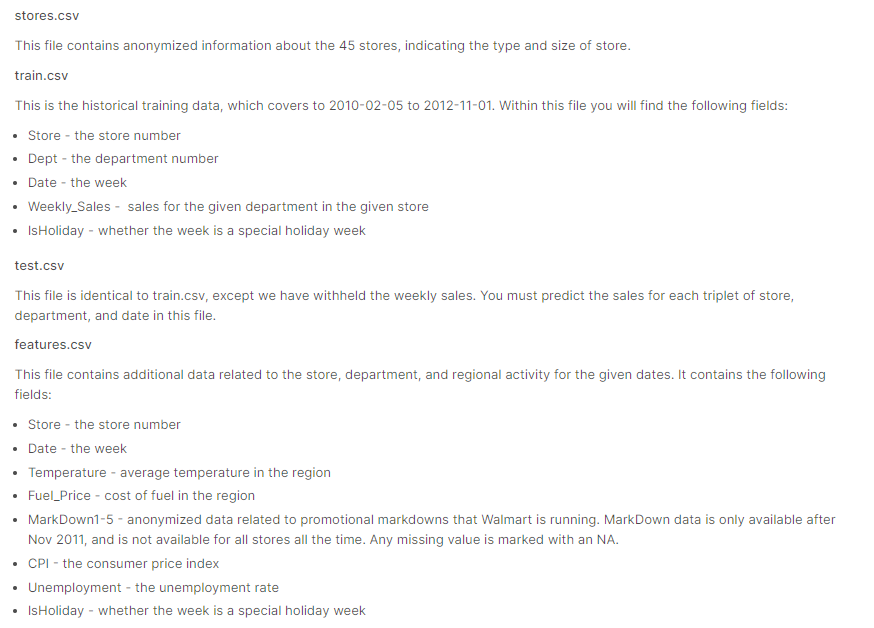

<h1><b>Metric</b></h1>

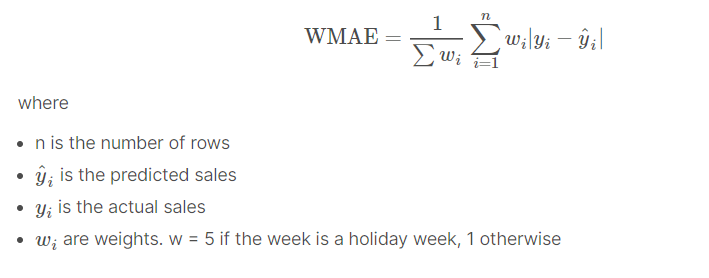

<h1><b>Business Objectives and Constraints </b></h1>

<h3>1.) Stationary may not be well preserved.</h3>

<h3>2.) The evaluation metric used here is the weighted absolute mean deviation of the predicted value from the ground truth value.</h3>

<h3>3.) For holidays, the predictions are given more weightage.We need to focus relatively more on the observations which are recorded in the holidays.</h3>

<h3>4.) If we correctly model the observations, this could help Walmart in deciding upon their future budget,materials,etc. This could increase their revenue substantially.</h3>



<h1><b> Useful Links </b></h1>

https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data

https://www.tutorialspoint.com/sales_forecasting/sales_forecasting_introduction.htm

https://www.walmart.com/

<h1><b>Installing the required libraries </b></h1>

In [ ]:
# pip is one of the package manager for installing packages in python
!pip install pandas 
!pip install numpy 
!pip install matplotlib 
!pip install sklearn 
!pip install xgboost
!pip install seaborn

<h1><b>Importing the libraries </b></h1>

In [1]:
# Importing the necessary libraries..
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from collections import Counter
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

<h1>Downloading the Dataset </h1>

The dataset is provided by the Kaggle website. There are many ways to download the data from Kaggle.I will provide one such method which is easy and less messy.

Steps to download the data from Kaggle :

1.) Login to your Kaggle account

2.) Download <b>CurlWget</b> extension from Google Chrome Browser.

3.) Search for the data in the Kaggle search bar.

4.) Click the <b>Download All</b> button.

5.) Then cancel the download.

6.) Open your CurlWget extension which is present in the top right corner of your browser.

7.) Copy the link provided in it.

<b>Disclaimer :</b> The above method may violate the Kaggle regulations.

The below section is for Linux users. If you are running on windows, you can perform the same operations locally.

In [ ]:
# wget command is used to download files
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.80 Safari/537.36 Edg/86.0.622.43" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3816/32105/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1603380552&Signature=WIOG8sa41hXpOQloEw98bPAb6lwkyws8jRMeQKV4%2Frk5eTkipwyoXNJhxbGRWGaax6fnhBcZW92D9VaoegljDDg%2BF1nQdvT0385muK9zJLG%2Bkb4FS3MY0MHPhbUOYJ6LaIAK%2FPOHp0lSduaxKDfcfOKbu71n0v3athwUIY3vY2UIkUmZKzX6jENeGR2fi%2Fk9TKDjiZX4rikeZUbSdJVSeX9m%2FoNCBXyZQD2Dx6cLjNGGYm161WUt0zBWbG8py2AaL%2B2qR3osnU8YZ6HS2yRhrpGTqWBDDovp696UriApxTZds0%2F5QotN5v8e1oQ7u%2FuPaGwc1B8mAgSNc0EXuLdSDA%3D%3D&response-content-disposition=attachment%3B+filename%3Dwalmart-recruiting-store-sales-forecasting.zip" -c -O 'walmart-recruiting-store-sales-forecasting.zip'

We need to extract the files from the compressed file.

We will use the unzip command to do our task.

In [ ]:
# Unzipping the files downloaded.
!unzip 'walmart-recruiting-store-sales-forecasting.zip'

After we execute the above command,the following files are shown

stores.csv

test.csv.zip

train.csv.zip

features.csv.zip

We need to extract again the compressed file.

<b>We are given some past observations about the Walmart stores. Our task here is to predict the weekly sales by using these observations. These observations are indexed by the time at which it was recorded. So, this is a time-series problem. There are many statistical algorithms to model the time-series data. But, our goal here is to model the same observations using traditional machine learning algorithms.

In [ ]:
# Unzipping the files downloaded.
!unzip 'test.csv.zip'
!unzip 'train.csv.zip'
!unzip 'features.csv.zip'

<h1> Contents </h1>

<h2>1.) Exploratory Data Analysis + Feature Engineering</h2>

<h2>2.) Modelling </h2>

<h2>3.) Validation </h2>

<h1>1.) Exploratory Data Analysis + Feature Engineering</h1>

First, we need to read the data from disk. Then, we will visualize the data in a tabular format.

In [2]:
# Reading the csv files from the disk using read_csv method from pandas library.It converts the data into pandas dataframe object.

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')

In [3]:
# Using the head method, we display the dataframe
train.head(5)

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

<h3>The train dataframe contains ['Store' , 'Dept' , 'Date' , 'Weekly_Sales' , 'IsHoliday' ] as its attributes.</h3>

<h3>For each store and department, the Weekly_Sales attribute contains the total sales for a week. </h3>
<h3> Each successive date is approximately 7 days ahead of the previous date.</h3>

In [4]:
# Displaying the dataframes.Using the head method which accepts the number of rows as argument, we display the dataframe
test.head(5)

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

<h3> Using the training data , we need to infer the weekly sales for the test data.</h3>

<h3> The dates present in the test data are not in the training data.</h3>

<h3>Infact , we are estimating the weekly sales for the future using the past observations. </h3>

In [5]:
# Displaying the dataframes.Using the head method which accepts the number of rows as argument, we display the dataframe
features.head(5)

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

<h3> This dataframe contains some additional attributes for each store and department in the training dataset. </h3>

<h3> The details about these attributes are given in the beginning of this notebook. </h3>

In [6]:
# Displaying the dataframes.Using the head method which accepts the number of rows as argument, we display the dataframe
stores.head(5)

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

<h3>For each store , we have a attribute named Type associated with it. </h3>

<h3>For each store , we have a attribute named Size associated with it. </h3>

<h3> Since the attributes contained in the features and stores dataframe are related to the attributes in the train dataframe, we will try to merge these dataframes together. </h3>

<h3>Whatever feature is added to our training data, the same should reflect on the test data. We concatenate both the train and test data to make our job easier. </h3>

In [7]:
# The merge operation is supported by the merge method.

# We are merging the train and the test dataframe.If we add any additional feature to the training data,then simulataneously 
# it will also get added to the test data.
train_df = pd.concat([train,test],axis=0,ignore_index=True)

# We are merging the train and features dataframe where they intersect each other.
data=pd.merge(train_df,features,how='inner',on=['Store','Date','IsHoliday'])

# We are merging the above resultant dataframe with the stores dataframe where they intersect each other.
walmart_df=pd.merge(data,stores,how='inner',on=['Store'])

In [8]:
# Printing the dataframe.
# Now every attributes about the store and department are in a single dataframe.Now it is easier to analyze.
walmart_df.head(5)

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     2  2010-02-05      50605.27      False        42.31       2.572   
2      1     3  2010-02-05      13740.12      False        42.31       2.572   
3      1     4  2010-02-05      39954.04      False        42.31       2.572   
4      1     5  2010-02-05      32229.38      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   
2        NaN        NaN        NaN        NaN        NaN  211.096358   
3        NaN        NaN        NaN        NaN        NaN  211.096358   
4        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

In [9]:
# Printing the number of records.The len function returns the number of records in the dataframe.
print("Number of records ",len(walmart_df))

Number of records  536634


Here the number of records is calculated by adding the total number of records present in the training and in test data. This is beacuase, we concatenated the train and test dataset earlier.

In [10]:
#Printing the number of records.
print("Number of records present in the training data ",len(train))
print("Number of records present in the test data ",len(test))

Number of records present in the training data  421570
Number of records present in the test data  115064


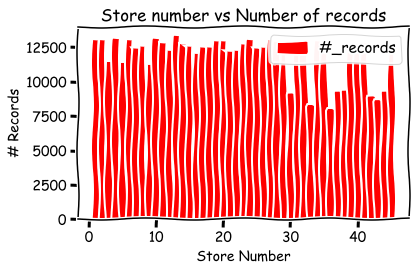

In [11]:
#For each type of stores , we are counting the number of records
#Creating a counter object on store attribute.
features_store = Counter(walmart_df['Store'].values)

#Matplotlib style(comics)
plt.xkcd()

#Storing the values of the type of stores in x
x = list(features_store.keys())
#Storing the values of the counts of each type of stores in y
y = list(features_store.values())



#Plotting the barplot with x and y
plt.bar(x,y,label='#_records',color='r')

#For displaying purpose
plt.legend(prop={'size':15})
plt.xlabel('Store Number')
plt.ylabel('# Records')
plt.title('Store number vs Number of records')

#Displaying the plot
plt.tight_layout()
plt.show()

We have atleast 7500 observations for each store.

These observations were taken from 2010 - 02 - 05  to  2013 - 07 - 26.

In [12]:
# The describe method returns a dataframe containing some common statistical properies of the data
walmart_df.describe()

Store           Dept   Weekly_Sales    Temperature  \
count  536634.000000  536634.000000  421570.000000  536634.000000   
mean       22.208621      44.277301   15981.258123      58.771762   
std        12.790580      30.527358   22711.183519      18.678716   
min         1.000000       1.000000   -4988.940000      -7.290000   
25%        11.000000      18.000000    2079.650000      45.250000   
50%        22.000000      37.000000    7612.030000      60.060000   
75%        33.000000      74.000000   20205.852500      73.230000   
max        45.000000      99.000000  693099.360000     101.950000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  536634.000000  265596.000000  197685.000000  242326.000000   
mean        3.408310    7438.004144    3509.274827    1857.913525   
std         0.430861    9411.341379    8992.047197   11616.143274   
min         2.472000   -2781.450000    -265.760000    -179.260000   
25%         3.041000    2114.640000      72.500000       7.220000   
50%         3.523000    5126.540000     385.310000      40.760000   
75%         3.744000    9303.850000    2392.390000     174.260000   
max         4.468000  103184.980000  104519.540000  149483.310000   

           MarkDown4      MarkDown5            CPI   Unemployment  \
count  237143.000000  266496.000000  498472.000000  498472.000000   
mean     3371.556866    4324.021158     172.090481       7.791888   
std      6872.281734   13549.262124      39.542149       1.865076   
min         0.220000    -185.170000     126.064000       3.684000   
25%       336.240000    1570.112500     132.521867       6.623000   
50%      1239.040000    2870.910000     182.442420       7.795000   
75%      3397.080000    5012.220000     213.748126       8.549000   
max     67474.850000  771448.100000     228.976456      14.313000   

                Size  
count  536634.000000  
mean   136678.550960  
std     61007.711799  
min     34875.000000  
25%     93638.000000  
50%    140167.000000  
75%    202505.000000  
max    219622.000000

For the Weekly_Sales attribute, we have a total of 421570 valid values. 

The Weekly_Sales attribute is not present in the test data, hence we only have 421570 values. 

The others are marked as NaN. We could either fill it with 0 or leave it as it is.

We observe some missing values in the CPI and Unemployment attribute.

<h3> We will fill the missing values in the CPI and Unemployment attribute with the respective mean computed by grouping the store and department </h3>

In [13]:
#A boolean array denoting the presence of nan values
missing_cpi = walmart_df['CPI'].isna()
missing_unemp = walmart_df['Unemployment'].isna()

mean_c = walmart_df['CPI'].mean()
mean_u = walmart_df['Unemployment'].mean()

#Calculating the average CPI and Unemployment based on grouping the Store,Department.
mean_CPI = walmart_df.groupby(['Store','Dept'])['CPI'].mean()
mean_Unemployment = walmart_df.groupby(['Store','Dept'])['Unemployment'].mean()

#Iterating through the records
for i in range(len(missing_cpi)):
    #If the value is missing in the CPI attribute
    if missing_cpi[i]:
        #Getting the index to retrieve the average value
        index = (walmart_df['Store'][i],walmart_df['Dept'][i])
        #Checking whether the index is present or not.
        try:
            mean_cpi = mean_CPI.get(index)
        #If not,fill it with 0.
        except KeyError:
            mean_cpi = mean_c
        walmart_df['CPI'][i] = mean_cpi
    #If the value is missing in the Unemployment attribute
    if missing_unemp[i]:
        #Getting the index to retrieve the average value.
        index = (walmart_df['Store'][i],walmart_df['Dept'][i])
        #Checking whether the index is present or not.
        try:
            mean_unemp = mean_Unemployment.get(index)
        #If the index is not present,fill it with 0.
        except KeyError:
            mean_unemp = mean_u
        walmart_df['Unemployment'][i] = mean_unemp
        
#For some store and department,the CPI and Unemployment are not present.We can't calculate the mean.Therefore, we fill with 0
walmart_df['CPI'] = walmart_df['CPI'].fillna(mean_c)
walmart_df['Unemployment'] = walmart_df['Unemployment'].fillna(mean_u)

In [14]:
walmart_df.describe()

Store           Dept   Weekly_Sales    Temperature  \
count  536634.000000  536634.000000  421570.000000  536634.000000   
mean       22.208621      44.277301   15981.258123      58.771762   
std        12.790580      30.527358   22711.183519      18.678716   
min         1.000000       1.000000   -4988.940000      -7.290000   
25%        11.000000      18.000000    2079.650000      45.250000   
50%        22.000000      37.000000    7612.030000      60.060000   
75%        33.000000      74.000000   20205.852500      73.230000   
max        45.000000      99.000000  693099.360000     101.950000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  536634.000000  265596.000000  197685.000000  242326.000000   
mean        3.408310    7438.004144    3509.274827    1857.913525   
std         0.430861    9411.341379    8992.047197   11616.143274   
min         2.472000   -2781.450000    -265.760000    -179.260000   
25%         3.041000    2114.640000      72.500000       7.220000   
50%         3.523000    5126.540000     385.310000      40.760000   
75%         3.744000    9303.850000    2392.390000     174.260000   
max         4.468000  103184.980000  104519.540000  149483.310000   

           MarkDown4      MarkDown5            CPI   Unemployment  \
count  237143.000000  266496.000000  536634.000000  536634.000000   
mean     3371.556866    4324.021158     172.095012       7.791007   
std      6872.281734   13549.262124      39.531842       1.854257   
min         0.220000    -185.170000     126.064000       3.684000   
25%       336.240000    1570.112500     132.529129       6.623000   
50%      1239.040000    2870.910000     182.532086       7.771000   
75%      3397.080000    5012.220000     213.933217       8.549000   
max     67474.850000  771448.100000     228.976456      14.313000   

                Size  
count  536634.000000  
mean   136678.550960  
std     61007.711799  
min     34875.000000  
25%     93638.000000  
50%    140167.000000  
75%    202505.000000  
max    219622.000000

<h3>1.) For the MarkDown attributes, the values in the count attribute is less than the number of records. There are some missing values in the MarkDown attributes.</h3>

<h3> 2.) We observe a negative value in the min attribute for Weekly_Sales. The value in the Weekly_Sales can't be negative.</h3>

<h3> 3.) The value in the 100th percentile(max) for the Weekly_Sales attribute is much higher than the value in the 75th percentlile. The Weekly_Sales attribute may contain some outliers. </h3>

<h2> Solution </h2>

<h3> 1.) There are many ways to fill the missing values. We don't know anything about the MarkDown attribute.It is anonymous. Since the attribute is anonymous, it is better to fill it with 0. The value zero represents the absence of MarkDown.</h3>

In [15]:
#Filling the missing values using fillna method.

for i in range(1,6):
    walmart_df['MarkDown{0}'.format(i)]=walmart_df['MarkDown{0}'.format(i)].fillna(0)

<h3>2.) Now , we can safely remove those records which have negative values in the Weekly_Sales attribute. </h3>

In [16]:
#Calculating the number of records in the train dataframe
num_records = len(walmart_df)
#Calculating the number of records with negative values in the Weekly_Sales attribute.
negative_records = len (walmart_df[ walmart_df['Weekly_Sales']<0 ])

print("Percentage of records with negative values in the Weekly_Sales attribute ",(negative_records/num_records)*100)

#Filling the missing values.It is not necessary, since we are not going to use it.
walmart_df['Weekly_Sales'] = walmart_df['Weekly_Sales'].fillna(0)

#We are converting the values in the Weekly_Sales attribute to positive if it is negative.
walmart_df['Weekly_Sales'] = walmart_df['Weekly_Sales'].map(lambda x:x if x>=0 else -x)

Percentage of records with negative values in the Weekly_Sales attribute  0.2394555693452148


In [17]:
#Printing the length of the dataframe.
print("Length of the dataframe ",len(walmart_df))

Length of the dataframe  536634


<h3>3.) We will try to render a boxplot for the Weekly_Sales attribute </h3>

In [18]:
#We will sort our dataframe based on the date.This is achieved using the sort_values method.
walmart_df.sort_values(by=['Date','Store','Dept'],inplace=True,ignore_index=True)

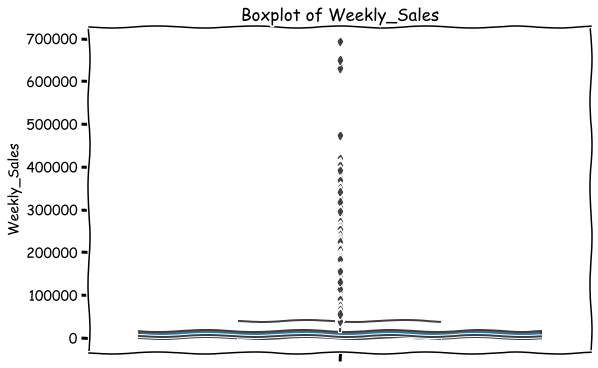

In [19]:
#Plotting the boxplot for the Weekly_Sales attribute
f, ax = plt.subplots(figsize=(9, 6))
plt.title('Boxplot of Weekly_Sales')
fig = sns.boxplot(y='Weekly_Sales', data=walmart_df)

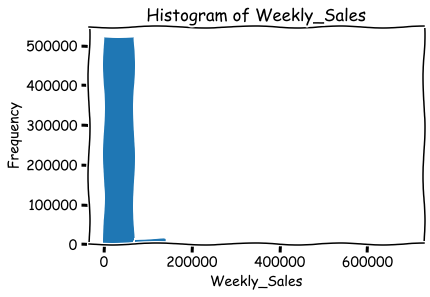

In [20]:
#Plotting the histogram of the Weekly_Sales attribute
plt.hist(walmart_df['Weekly_Sales'],bins=10)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Weekly_Sales')
plt.show()

<h3>There are many values which are greater than Q3 + 1.5*IQR. These could be outliers.</h3>

<h3>Since the notion of outliers is subjective, we need to further investigate on it.</h3>

<h3>Let us look at the attributes which contributes to higher sales. </h3>

<h3> We will try to render a pairplot </h3>

In [21]:
#We are looking at the records where the sales is more than its 75th percentile value.
walmart_df[walmart_df['Weekly_Sales']>20206]

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1  2010-02-05      24924.50      False        42.31   
1           1     2  2010-02-05      50605.27      False        42.31   
3           1     4  2010-02-05      39954.04      False        42.31   
4           1     5  2010-02-05      32229.38      False        42.31   
6           1     7  2010-02-05      21084.08      False        42.31   
...       ...   ...         ...           ...        ...          ...   
421539     45    40  2012-10-26      38673.87      False        58.85   
421553     45    72  2012-10-26      33366.60      False        58.85   
421562     45    90  2012-10-26      25352.32      False        58.85   
421564     45    92  2012-10-26      54608.75      False        58.85   
421567     45    95  2012-10-26      56017.47      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572       0.00       0.00        0.0       0.00       0.00   
1            2.572       0.00       0.00        0.0       0.00       0.00   
3            2.572       0.00       0.00        0.0       0.00       0.00   
4            2.572       0.00       0.00        0.0       0.00       0.00   
6            2.572       0.00       0.00        0.0       0.00       0.00   
...            ...        ...        ...        ...        ...        ...   
421539       3.882    4018.91      58.08      100.0     211.94     858.33   
421553       3.882    4018.91      58.08      100.0     211.94     858.33   
421562       3.882    4018.91      58.08      100.0     211.94     858.33   
421564       3.882    4018.91      58.08      100.0     211.94     858.33   
421567       3.882    4018.91      58.08      100.0     211.94     858.33   

               CPI  Unemployment Type    Size  
0       211.096358         8.106    A  151315  
1       211.096358         8.106    A  151315  
3       211.096358         8.106    A  151315  
4       211.096358         8.106    A  151315  
6       211.096358         8.106    A  151315  
...            ...           ...  ...     ...  
421539  192.308899         8.667    B  118221  
421553  192.308899         8.667    B  118221  
421562  192.308899         8.667    B  118221  
421564  192.308899         8.667    B  118221  
421567  192.308899         8.667    B  118221  

[105392 rows x 16 columns]

In [22]:
#pairplot function is used to render the pairplot between the independent and the dependent variables.
#We take only 421570 points.
slices = walmart_df[walmart_df['Weekly_Sales']>20206]

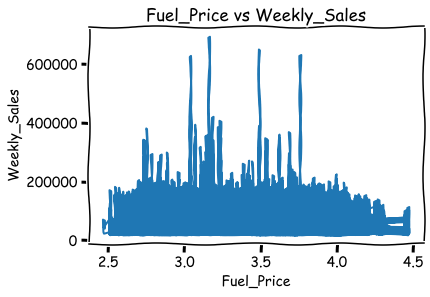

In [23]:
#Plotting the pairplot.
plt.plot(slices['Fuel_Price'],slices['Weekly_Sales'])
plt.title('Fuel_Price vs Weekly_Sales')
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')
plt.show()

<h3>There is no clear trend in the plot </h3>

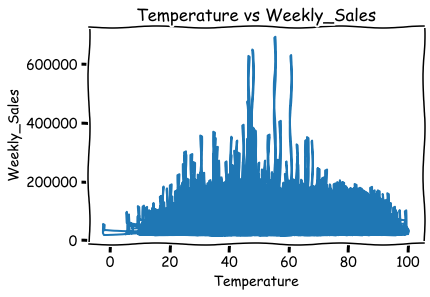

In [24]:
#Plotting the pairplot.
plt.xkcd()
plt.plot(slices['Temperature'],slices['Weekly_Sales'])
plt.title('Temperature vs Weekly_Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.show()

<h3>The sales are much higher when the temperature value attains its mean. </h3>

<h3>This is self-evident. People tend to go for shopping when the temperature is moderate. </h3>

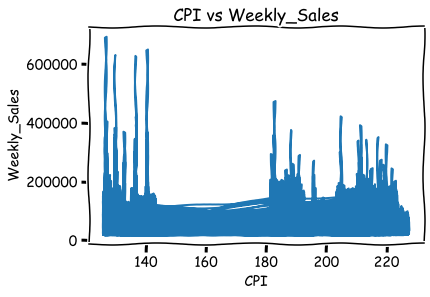

In [25]:
#Plotting the pairplot.
plt.plot(slices['CPI'],slices['Weekly_Sales'])
plt.title('CPI vs Weekly_Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')
plt.show()

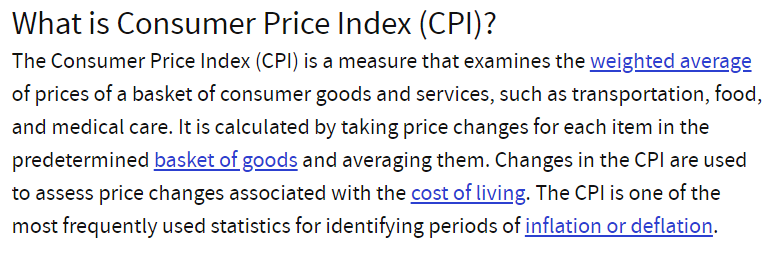

<h3>With the definition above, it is obvious that sales are much higher when the CPI is low.</h3>

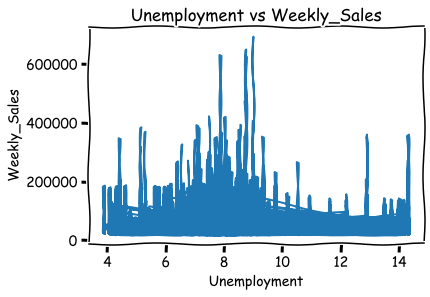

In [26]:
#Plotting the pairplot.
plt.plot(slices['Unemployment'],slices['Weekly_Sales'])
plt.title('Unemployment vs Weekly_Sales')
plt.xlabel('Unemployment')
plt.ylabel('Weekly_Sales')
plt.show()

<h3>There are more sales when the unemployment rate is low.</h3>

<h3>Still the unemployment rate doesn't decide the sales much </h3>

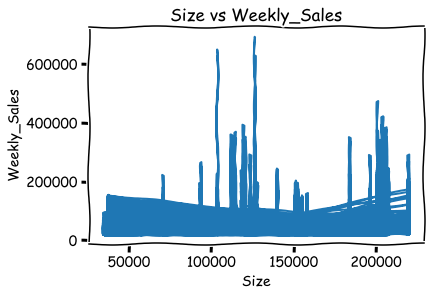

In [27]:
#Plotting the pairplot.
plt.plot(slices['Size'],slices['Weekly_Sales'])
plt.title('Size vs Weekly_Sales')
plt.xlabel('Size')
plt.ylabel('Weekly_Sales')
plt.show()

<h3>There is no linear relationship between these attributes.</h3>

<h3>Typically one would expect a linear relationship </h3>

In [28]:
#Routine to plot the barplot
x = np.arange(1,46,1)
def barplot(y,ylabel,title,color):
    #Label for the abscissa
    xlabel='Store Number'
    #Style(Comic)
    plt.xkcd()
    
    #Barplot definition
    plt.bar(x,y,label=ylabel,color=color)

    #Setting the font size for the label
    plt.legend(prop={'size':15})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    #For size adjustments
    plt.tight_layout()
    #Displaying the actual plot
    plt.show()

In [29]:
#Routine to display a normal plot
def plots(attribute,ylabel):
    xlabel = 'Week in units'
    title = 'Week vs '+ylabel
    plt.plot(attribute)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [30]:
#Routine to display a histogram based on the attribute passes.
def histogram(attribute,xlabel,ylabel,title,color):
    #hist function is used to plot the histogram by specifying the bins.
    plt.hist(attribute,color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

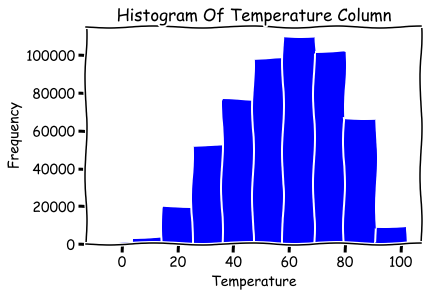

In [31]:
histogram(walmart_df['Temperature'],'Temperature','Frequency','Histogram Of Temperature Column','b')

Loosely, it follows a gaussian distribution.

The average temperature is around 60 Celsius

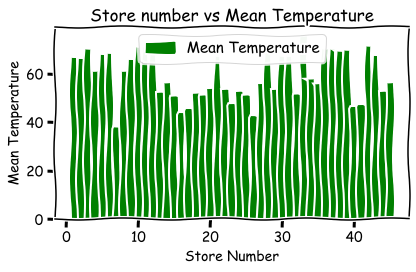

In [32]:
y = walmart_df.groupby(by='Store')['Temperature'].mean().values
barplot(y,'Mean Temperature','Store number vs Mean Temperature','g')

On average , all type of stores have their mean temperature greater than 40 Celsius.

Only few stores have more than 80 Celsius as their mean temperature.

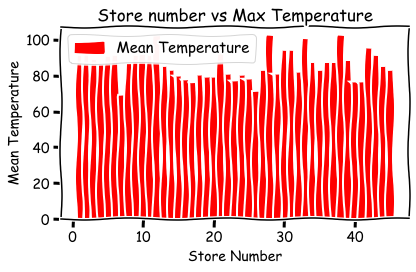

In [33]:
y = walmart_df.groupby(by='Store')['Temperature'].max().values
barplot(y,'Mean Temperature','Store number vs Max Temperature','r')

The maximum temperature was recorded in the store #12.This may affect the sales.

Some people prefer to go for shopping by deciding upon the temperature.

The minimum threshold is around 60 degrees.It is quite closer to the mean temperature.

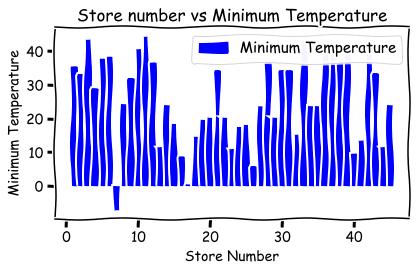

In [34]:
y = walmart_df.groupby(by='Store')['Temperature'].min().values
barplot(y,'Minimum Temperature','Store number vs Minimum Temperature','b')

The global minimum temperature across all the stores is lesser than -6 Celsius.

But, most of the stores has their minimum temperature recorded above 0 Celsius.

It may be wrongly imputed.

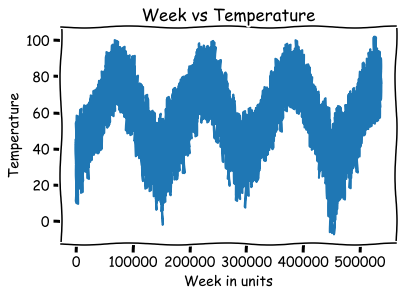

In [35]:
plots(walmart_df['Temperature'],'Temperature')

The variations is loosely stationery .

The values of the temperature forms a cluster for every certain period of weeks .

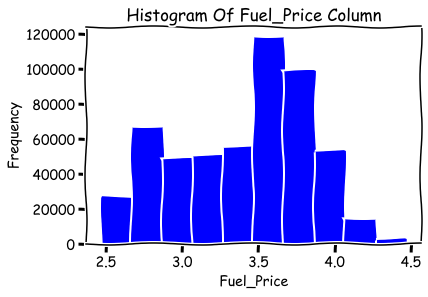

In [36]:
histogram(walmart_df['Fuel_Price'],'Fuel_Price','Frequency','Histogram Of Fuel_Price Column','b')

Most of the values are between 3.5 and 3.9

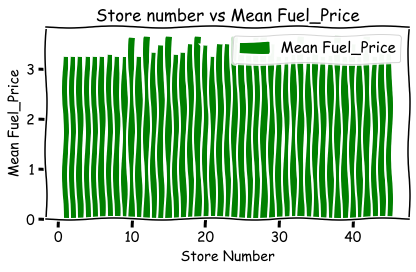

In [37]:
y = walmart_df.groupby(by='Store')['Fuel_Price'].mean().values
barplot(y,'Mean Fuel_Price','Store number vs Mean Fuel_Price','g')

On average, the fuel price recorded is around 3 for all regions where stores are located.

This may not discriminate among different stores.

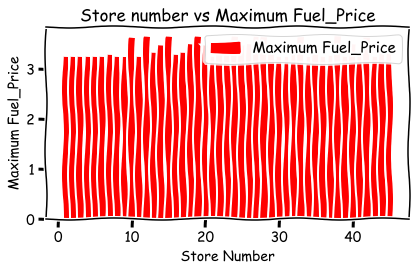

In [38]:
y = walmart_df.groupby(by='Store')['Fuel_Price'].mean().values
barplot(y,'Maximum Fuel_Price','Store number vs Maximum Fuel_Price','r')

The maximum and mean value appears to be same.

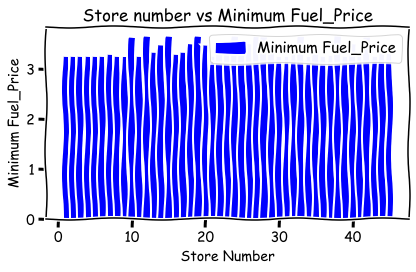

In [39]:
y = walmart_df.groupby(by='Store')['Fuel_Price'].mean().values
barplot(y,'Minimum Fuel_Price','Store number vs Minimum Fuel_Price','b')

The minimum and mean value appears to be same.

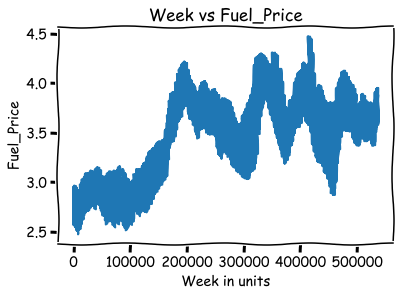

In [40]:
plots(walmart_df['Fuel_Price'],'Fuel_Price')

The prices of the fuel as time varies

The MarkDown attribute is anonymous.

We can't comment about it.

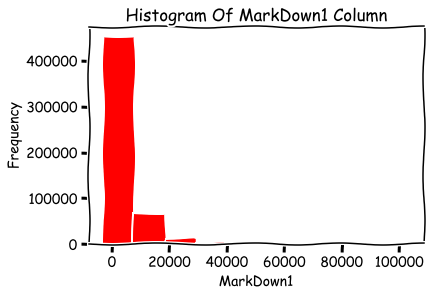

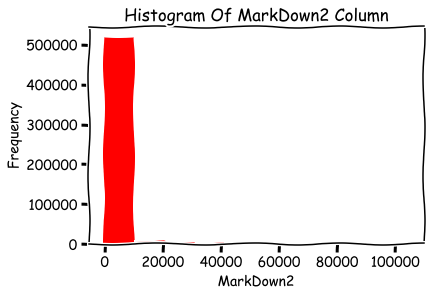

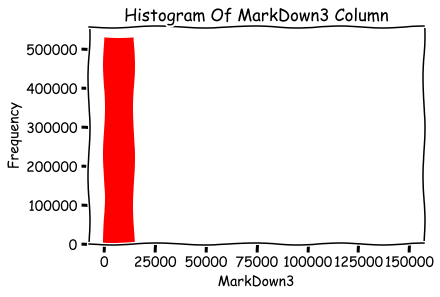

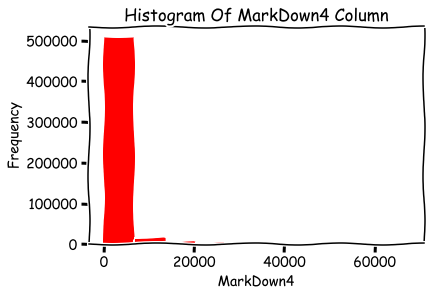

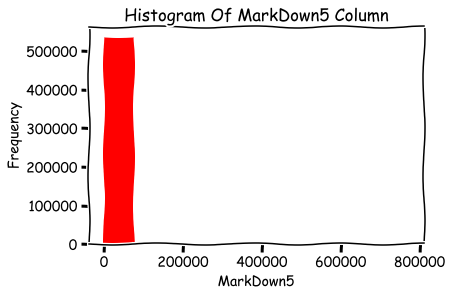

In [41]:
for i in range(1,6):
    histogram(walmart_df['MarkDown{0}'.format(i)],'MarkDown{0}'.format(i),'Frequency','Histogram Of MarkDown{0} Column'.format(i),'r')

Since markdown events occur twice or thrice in a year, more number of NaN values are present.

Loosely, all the attributes have same distribution.

It is highly skewed.

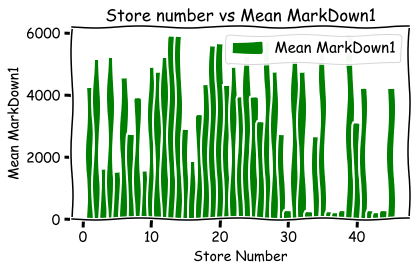

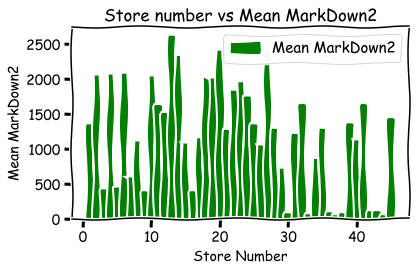

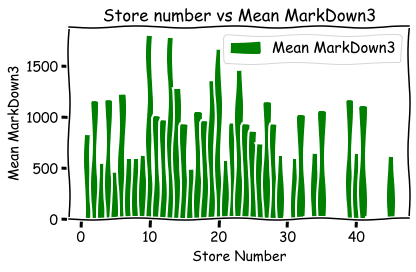

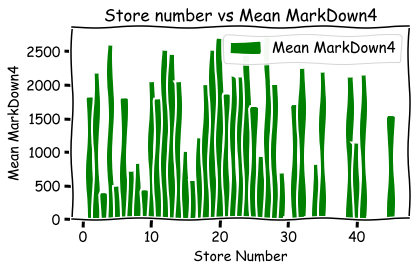

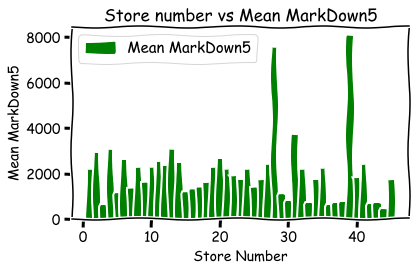

In [42]:
for i in range(1,6):
    y = walmart_df.groupby(by='Store')['MarkDown{0}'.format(i)].mean().values
    barplot(y,'Mean MarkDown{0}'.format(i),'Store number vs Mean MarkDown{0}'.format(i),'g')

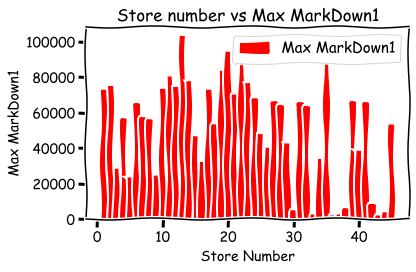

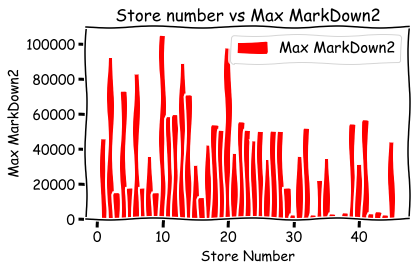

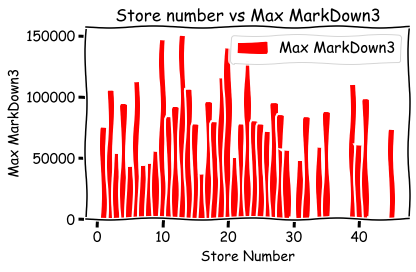

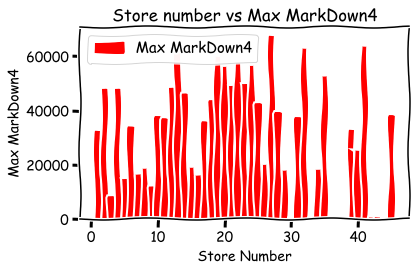

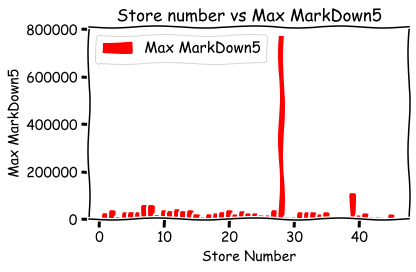

In [43]:
for i in range(1,6):
    y = walmart_df.groupby(by='Store')['MarkDown{0}'.format(i)].max().values
    barplot(y,'Max MarkDown{0}'.format(i),'Store number vs Max MarkDown{0}'.format(i),'r')

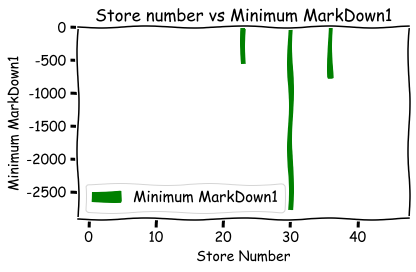

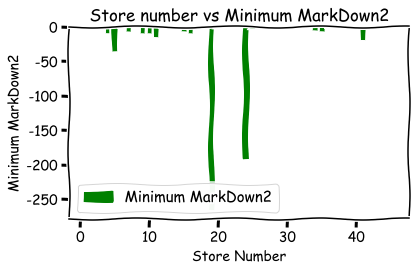

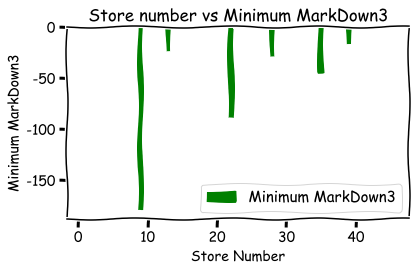

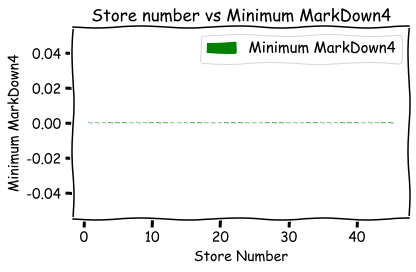

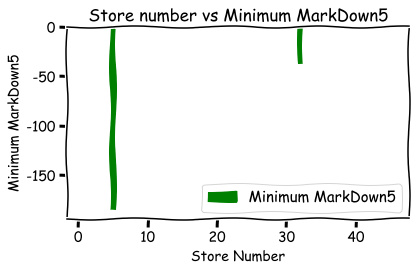

In [44]:
for i in range(1,6):
    y = walmart_df.groupby(by='Store')['MarkDown{0}'.format(i)].min().values
    barplot(y,'Minimum MarkDown{0}'.format(i),'Store number vs Minimum MarkDown{0}'.format(i),'g')

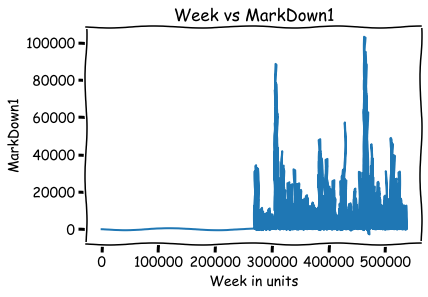

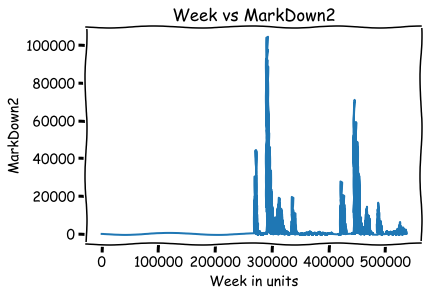

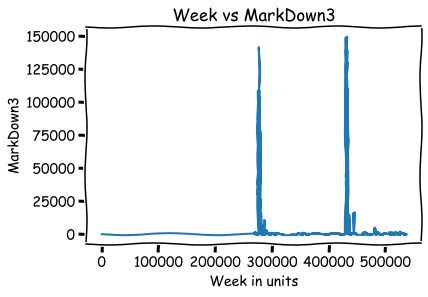

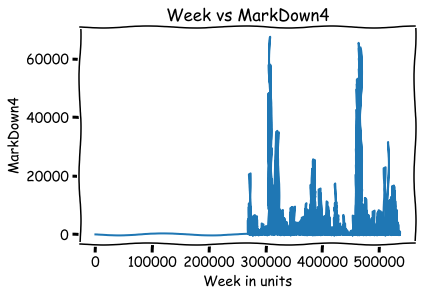

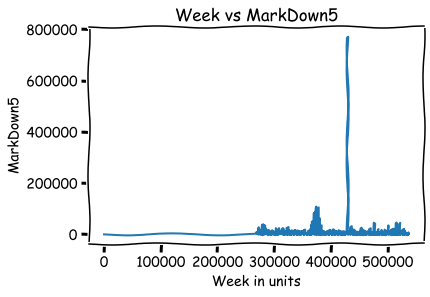

In [45]:
for i in range(1,6):
    plots(walmart_df['MarkDown{0}'.format(i)],'MarkDown{0}'.format(i))

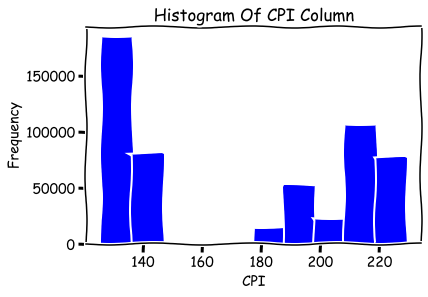

In [46]:
#Plotting the histogram of CPI column
histogram(walmart_df['CPI'],'CPI','Frequency','Histogram Of CPI Column','b')

The plot shows that, the price didn't decrease over a period of time substantially.

The maximum average difference was recorded above 220

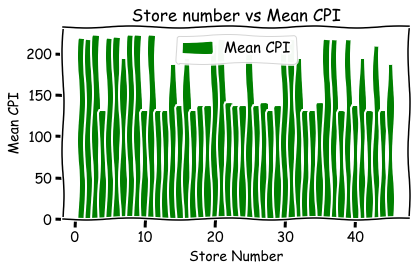

In [47]:
y = walmart_df.groupby(by='Store')['CPI'].mean().values
barplot(y,'Mean CPI','Store number vs Mean CPI','g')

All the stores recorded an mean CPI above 100. 

This shows that the price for the goods has not been decreased over a period of time.

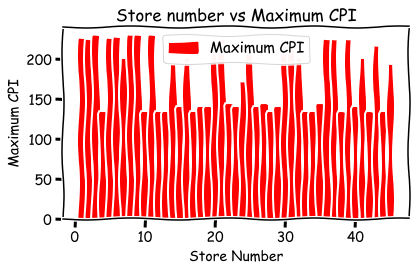

In [48]:
y = walmart_df.groupby(by='Store')['CPI'].max().values
barplot(y,'Maximum CPI','Store number vs Maximum CPI','r')

Some stores has their maximum CPI above 200.

In these stores, the sales may be dropped due to high prices.

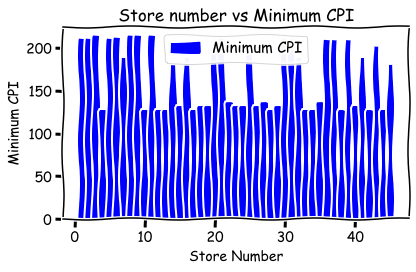

In [49]:
y = walmart_df.groupby(by='Store')['CPI'].min().values
barplot(y,'Minimum CPI','Store number vs Minimum CPI','b')

The minimum is above the mean value.

This is a good feature to comment about the sales.

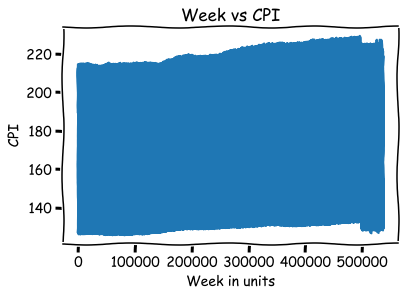

In [50]:
plots(walmart_df['CPI'],'CPI')

The CPI increases and decreases for a period of time. 

But it doesn't reach below 100.This shows that the price always increases.

In [51]:
#Filling the observations which as NaN values with the respective mean
features['Unemployment']=features['Unemployment'].fillna(features['Unemployment'].mean())

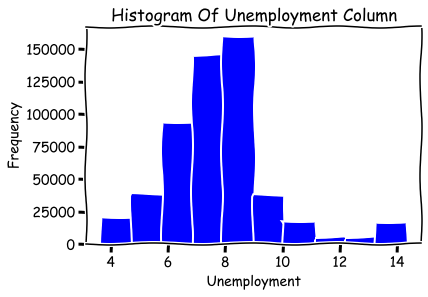

In [52]:
histogram(walmart_df['Unemployment'],'Unemployment','Frequency','Histogram Of Unemployment Column','b')

The unemployment rates are quite low. Most of them are employed.

This may affect the sales. Generally, working persons tend to buy more products.

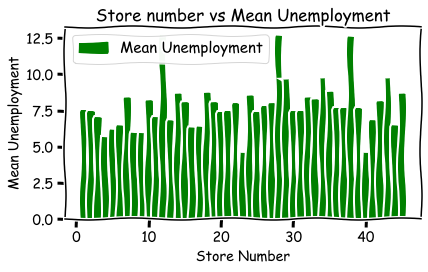

In [53]:
y = walmart_df.groupby(by='Store')['Unemployment'].mean().values
barplot(y,'Mean Unemployment','Store number vs Mean Unemployment','g')

For certain stores, the unemployment rate is quite high relatively to other stores.

The sales for these stores maybe less compared to other stores.

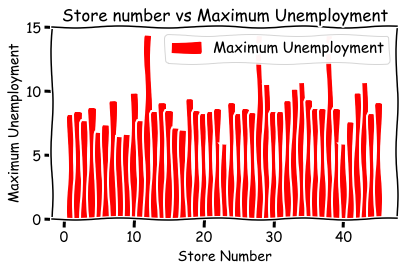

In [54]:
y = walmart_df.groupby(by='Store')['Unemployment'].max().values
barplot(y,'Maximum Unemployment','Store number vs Maximum Unemployment','r')

7.5 % of the stores have around 15 percent unemployment rate in the region where it is located.

It is quite high relative to the mean.

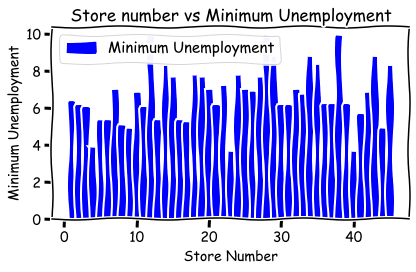

In [55]:
y = walmart_df.groupby(by='Store')['Unemployment'].min().values
barplot(y,'Minimum Unemployment','Store number vs Minimum Unemployment','b')

Atleast 3 % of the people in a region are unemployed.

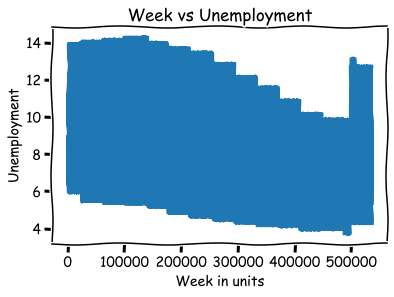

In [56]:
plots(walmart_df['Unemployment'],'Unemployment')

<h3>Now , we will look at the dates where the sales are much higher. </h3>

In [57]:
#Selecting thos records
slices = walmart_df[walmart_df['Weekly_Sales']>250000]

In [58]:
slices

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
979        14    92  2010-02-05     293966.05      False        27.31   
123112      2    72  2010-11-26     285353.53       True        62.98   
123247      4    72  2010-11-26     381072.11       True        48.08   
123381      6    72  2010-11-26     342578.65       True        65.79   
123652     10    72  2010-11-26     693099.36       True        55.33   
...       ...   ...         ...           ...        ...          ...   
288741     10     7  2011-12-23     341308.00      False        48.36   
288789     10    72  2011-12-23     296628.29      False        48.36   
288954     13     7  2011-12-23     259669.14      False        24.76   
289029     14     7  2011-12-23     260735.86      False        42.27   
289076     14    72  2011-12-23     254275.88      False        42.27   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
979          2.784       0.00       0.00       0.00       0.00       0.00   
123112       2.735       0.00       0.00       0.00       0.00       0.00   
123247       2.752       0.00       0.00       0.00       0.00       0.00   
123381       2.735       0.00       0.00       0.00       0.00       0.00   
123652       3.162       0.00       0.00       0.00       0.00       0.00   
...            ...        ...        ...        ...        ...        ...   
288741       3.541     300.02      77.73    2432.01     108.37    4078.21   
288789       3.541     300.02      77.73    2432.01     108.37    4078.21   
288954       3.186     686.24     193.26    2971.53     239.78    3567.03   
289029       3.389     924.14     112.73    2127.77      80.02    4638.81   
289076       3.389     924.14     112.73    2127.77      80.02    4638.81   

               CPI  Unemployment Type    Size  
979     181.871190         8.992    A  200898  
123112  211.406287         8.163    A  202307  
123247  126.669267         7.127    A  205863  
123381  213.267296         7.007    A  202505  
123652  126.669267         9.003    B  126512  
...            ...           ...  ...     ...  
288741  129.984548         7.874    B  126512  
288789  129.984548         7.874    B  126512  
288954  129.984548         6.392    A  219622  
289029  188.929975         8.523    A  200898  
289076  188.929975         8.523    A  200898  

[62 rows x 16 columns]

In [59]:
print(np.unique(slices['Date']))

['2010-02-05' '2010-11-26' '2010-12-17' '2010-12-24' '2011-11-25'
 '2011-12-23']


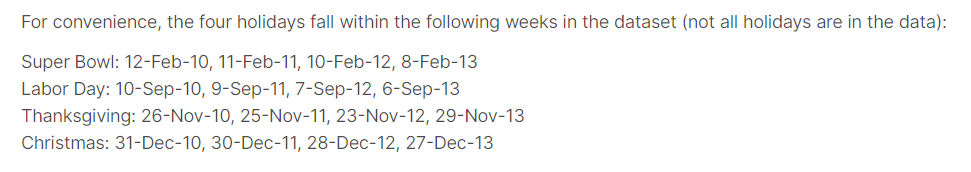

<h3> The above information are provided in the Competition website.</h3>
    
<h3>These dates exactly matches with the dates given in the website where the sales are much higher. The dates mentioned above are very crucial in the modelling stage.</h3>

<h3>These dates decides the range of values the Weekly_Sales attribute takes. </h3>

<h3>To incorporate this information, we need to define a flag variable to denote the presence of these dates.</h3>

In [60]:
#Converting the date passed as a string to pandas datetime object
def date(dates):
    return pd.to_datetime(dates)

In [61]:
#Converting the Date attribute in the dataframe to pandas datetime object.
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'])

In [62]:
#We are defining a variable with two values ('Y','N'). It is set to 'Y', if the date is present and vice-versa.
#np.where function sets the second argument as the value if the condition holds true and the third argument as the value if it doesn't.
Super_bowl = ['2010-02-05','2010-02-12','2011-02-11','2012-02-10','2013-02-08']
Labor_Day = ['2010-09-10','2011-09-09','2012-09-07','2013-09-06']
Thanksgiving = ['2010-11-26','2011-11-23','2011-11-25','2012-11-23','2013-11-29']
Christmas = ['2010-12-24','2010-12-31','2011-12-30','2012-12-28','2013-12-27']

walmart_df['Super_Bowl'] = np.where((walmart_df['Date']==date(Super_bowl[0])) | (walmart_df['Date']==date(Super_bowl[1])) | (walmart_df['Date']==date(Super_bowl[2])) | (walmart_df['Date']==date(Super_bowl[3])) | (walmart_df['Date']==date(Super_bowl[4])),1,0)
walmart_df['Labor_Day'] = np.where((walmart_df['Date']==date(Labor_Day[0])) | (walmart_df['Date']==date(Labor_Day[1])) | (walmart_df['Date']==date(Labor_Day[2])) | (walmart_df['Date']==date(Labor_Day[3])),1,0)
walmart_df['Thanksgiving'] = np.where((walmart_df['Date']==date(Thanksgiving[0])) | (walmart_df['Date']==date(Thanksgiving[1])) | (walmart_df['Date']==date(Thanksgiving[2])) | (walmart_df['Date']==date(Thanksgiving[3])) | (walmart_df['Date']==date(Thanksgiving[4])),1,0)                                                                              
walmart_df['Christmas'] = np.where((walmart_df['Date']==date(Christmas[0])) | (walmart_df['Date']==date(Christmas[1])) | (walmart_df['Date']==date(Christmas[2])) | (walmart_df['Date']==date(Christmas[3])) | (walmart_df['Date']==date(Christmas[4])),1,0)                                                                                                                         

In [63]:
#Printing the dataframe.
walmart_df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     2 2010-02-05      50605.27      False        42.31       2.572   
2      1     3 2010-02-05      13740.12      False        42.31       2.572   
3      1     4 2010-02-05      39954.04      False        42.31       2.572   
4      1     5 2010-02-05      32229.38      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.096358   
2        0.0        0.0        0.0        0.0        0.0  211.096358   
3        0.0        0.0        0.0        0.0        0.0  211.096358   
4        0.0        0.0        0.0        0.0        0.0  211.096358   

   Unemployment Type    Size  Super_Bowl  Labor_Day  Thanksgiving  Christmas  
0         8.106    A  151315           1          0             0          0  
1         8.106    A  151315           1          0             0          0  
2         8.106    A  151315           1          0             0          0  
3         8.106    A  151315           1          0             0          0  
4         8.106    A  151315           1          0             0          0

<h3> We will see whether the increase in temperature affects the sales or not. </h3>

In [64]:
#This routine calculates the length of the longest subarray with inreasing values.
def maximum_length_increasing_subarray(array):
    #Initializing the length variable with 1.(Assumption:Atleast an array contains a single element in it.)
    length = 1
    #Initialzing the starting position(If the array contains a single element,then start=0)
    start=0
    #Initializing the  m variable. m-> It keeps track of the length.The value 1 denotes, atleast it has seen a single element.
    m = 1
    #For each element in the array
    for i in range(len(array)-2,-1,-1):
        #It denotes the condition for increasing.
        if array[i]<array[i+1]:
            m = m + 1
            #Updating the maximum_length so far.
            if length<m:
                length=m
                start=i
        else:
            m=1
    #Returning the length and starting position.
    return length,start

In [65]:
#Calling the method maximum_length_increasing_subarray
length,start=maximum_length_increasing_subarray(walmart_df['Temperature'])

In [66]:
#Printing the starting position and the length of the longest increasing subarray
print("Starting position of the maximum increasing subarray ",start)
print("Length of the maximum increasing subarray ",length)

Starting position of the maximum increasing subarray  536515
Length of the maximum increasing subarray  2


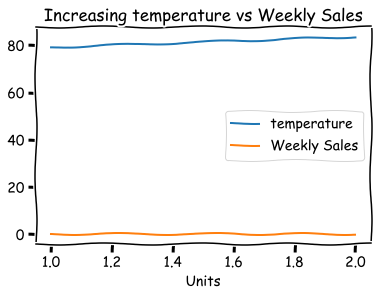

In [67]:
#8 is the length of the longest increasing subarray.
x = np.arange(1,length+1,1)
#Getting the temperature values
temp = walmart_df['Temperature'][start:start+length]
#Getting the sales values
sales = walmart_df['Weekly_Sales'][start:start+length]


#Plotting the temperature and the weekly sales simultaneously.
plt.plot(x,temp,label='temperature')
plt.plot(x,sales,label='Weekly Sales')
plt.xlabel('Units')
plt.title('Increasing temperature vs Weekly Sales')
plt.legend()
plt.plot()
plt.show()

In [68]:
#This routine calculates the length of the longest subarray with decreasing values.
def maximum_length_decreasing_subarray(array):
    #Initializing the length variable with 1.(Assumption:Atleast an array contains a single element in it.)
    length = 1
    #Initialzing the starting position(If the array contains a single element,then start=0)
    start=0
    #Initializing the  m variable. m-> It keeps track of the length.The value 1 denotes, atleast it has seen a single element.
    m = 1
    #For each element in the array
    for i in range(len(array)-2,-1,-1):
        #It denotes the condition for decreasing.
        if array[i]>array[i+1]:
            m = m + 1
            #Updating the maximum_length so far.
            if length<m:
                length=m
                start=i
        else:
            m=1
    #Returning the length and starting position.
    return length,start

In [69]:
#Calling the method maximum_length_decreasing_subarray
length,start=maximum_length_decreasing_subarray(walmart_df['Temperature'])

In [70]:
#Printing the starting position and the length of the longest decreasing subarray.
print("Starting position of the maximum decreasing subarray ",start)
print("Length of the maximum decreasing subarray ",length)

Starting position of the maximum decreasing subarray  536567
Length of the maximum decreasing subarray  2


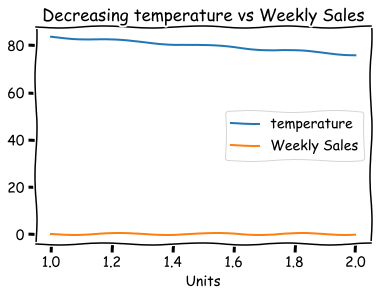

In [71]:
#8 is the length of the longest decreasing subarray.
x = np.arange(1,length+1,1)
#Getting the temperature values
temp = walmart_df['Temperature'][start:start+length]
#Getting the sales values
sales = walmart_df['Weekly_Sales'][start:start+length]


#Plotting the temperature and the weekly sales simultaneously.
plt.plot(x,temp,label='temperature')
plt.plot(x,sales,label='Weekly Sales')
plt.xlabel('Units')
plt.title('Decreasing temperature vs Weekly Sales')
plt.legend()
plt.plot()
plt.show()

<h3> We will render some more boxplots to enhance our knowledge on the weekly sales </h3>

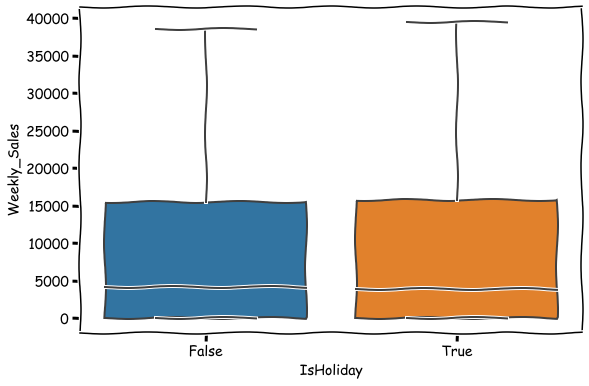

In [72]:
#Plotting the boxplot for weekly_sales in IsHoliday attribute
walmart_sale = pd.concat([walmart_df['IsHoliday'], walmart_df['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(9, 6))
fig = sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=walmart_sale, showfliers=False)

In the holidays, the maximum sales is more than in normal days.

The two distributions looks similar other than the maximum value.

The median sale is slightly larger in the holidays.

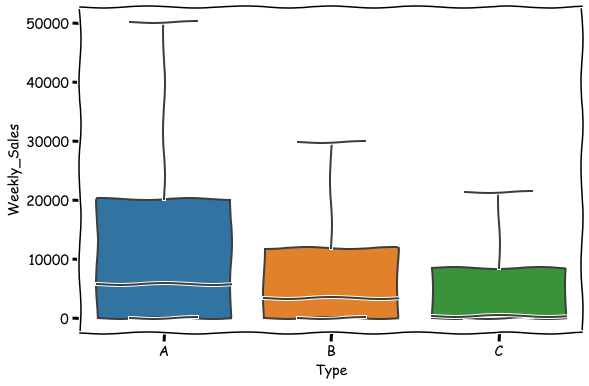

In [73]:
#Plotting the boxplot for weekly_sales in Type attribute
walmart_sale = pd.concat([walmart_df['Type'], walmart_df['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(9, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=walmart_sale, showfliers=False)

The weekly_sales is very low for Type C relative to other type.

This feature quite discriminates among other features.

This feature denotes the range of values the weekly_sales takes.

The store of type A has more sales than any other type.

Even the store of type A has more size . Therefore , size affects the sales.

<h3> Since we noticed that the type attribute discriminates the range of values the weekly_sales take, we will plot a pie-chart describing the size of each type of stores </h3>

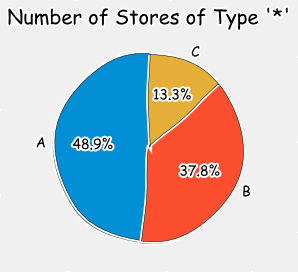

In [74]:
#For each stores,we are counting the number of records present for it.
stores_count = stores.groupby('Type')['Store'].count()


#Using a pie chart,we are displaying the relative percentage of the observations for each type of stores.
plt.style.use("fivethirtyeight")
slices=stores_count.values
colors=['orange','white','green']
labels=['A','B','C']
plt.pie(slices,labels=labels,wedgeprops={'edgecolor':'black'},shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Number of Stores of Type '*'")
plt.tight_layout()
plt.show()

The size of the type A store is much larger than other type of stores.

Therefore, the size attribute also discriminates the range of values the sales takes.

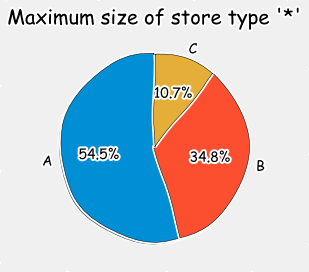

In [75]:
#For each type of stores , we are extracting the minimum size value.
stores_count = stores.groupby('Type')['Size'].max()

plt.style.use("fivethirtyeight")
slices=stores_count.values
colors=['orange','white','green']
labels=['A','B','C']
plt.pie(slices,labels=labels,wedgeprops={'edgecolor':'black'},shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Maximum size of store type '*'")
plt.tight_layout()
plt.show()

The maximum size of the type C is very low compared to other types. 

The sales in the type C store may be less compared to other types.

The sales in the type A store may be relatively high.

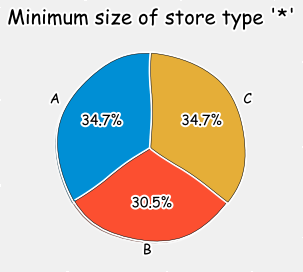

In [76]:
#For each type of stores , we are extracting the minimum size value.
stores_count = stores.groupby('Type')['Size'].min()

plt.style.use("fivethirtyeight")
slices=stores_count.values
colors=['orange','white','green']
labels=['A','B','C']
plt.pie(slices,labels=labels,wedgeprops={'edgecolor':'black'},shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Minimum size of store type '*'")
plt.tight_layout()
plt.show()

Here , the type A and C looks similar.

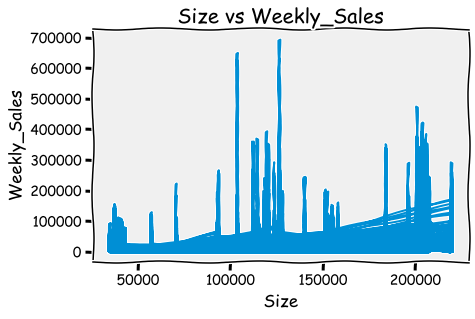

In [77]:
#Plotting the pairplot.
plt.xkcd()
plt.plot(walmart_df['Size'],walmart_df['Weekly_Sales'])
plt.title('Size vs Weekly_Sales')
plt.xlabel('Size')
plt.ylabel('Weekly_Sales')
plt.show()

The sales depends both on the date and the size of the store.

<h3> Since we are dealing with time-series data, the future observations depends on the past observations.</h3>

<h3>To incorporate this, we will add some columns which holds the previous weeks sales.</h3>

In [78]:
#Printing the dataframe.
walmart_df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     2 2010-02-05      50605.27      False        42.31       2.572   
2      1     3 2010-02-05      13740.12      False        42.31       2.572   
3      1     4 2010-02-05      39954.04      False        42.31       2.572   
4      1     5 2010-02-05      32229.38      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.096358   
2        0.0        0.0        0.0        0.0        0.0  211.096358   
3        0.0        0.0        0.0        0.0        0.0  211.096358   
4        0.0        0.0        0.0        0.0        0.0  211.096358   

   Unemployment Type    Size  Super_Bowl  Labor_Day  Thanksgiving  Christmas  
0         8.106    A  151315           1          0             0          0  
1         8.106    A  151315           1          0             0          0  
2         8.106    A  151315           1          0             0          0  
3         8.106    A  151315           1          0             0          0  
4         8.106    A  151315           1          0             0          0

In [79]:
#Adding an additional feature which holds the previous weeks sales
one_week_before = list(walmart_df['Weekly_Sales'])[:-1]
one_week_before.insert(0,walmart_df['Weekly_Sales'][0])
walmart_df['delta_1'] = one_week_before

#Adding an additional feature which holds the previous 2 weeks sales
two_week_before = list(walmart_df['Weekly_Sales'])[:-2]
two_week_before.insert(0,walmart_df['Weekly_Sales'][1])
two_week_before.insert(0,walmart_df['Weekly_Sales'][0])
walmart_df['delta_2'] = two_week_before

#Adding an additional feature which holds the previous 3 weeks sales
three_week_before = list(walmart_df['Weekly_Sales'])[:-3]
three_week_before.insert(0,walmart_df['Weekly_Sales'][2])
three_week_before.insert(0,walmart_df['Weekly_Sales'][1])
three_week_before.insert(0,walmart_df['Weekly_Sales'][0])
walmart_df['delta_3'] = three_week_before

In [80]:
#Printing the dataframe.
walmart_df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     2 2010-02-05      50605.27      False        42.31       2.572   
2      1     3 2010-02-05      13740.12      False        42.31       2.572   
3      1     4 2010-02-05      39954.04      False        42.31       2.572   
4      1     5 2010-02-05      32229.38      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  ...  Unemployment  Type    Size  \
0        0.0        0.0        0.0  ...         8.106     A  151315   
1        0.0        0.0        0.0  ...         8.106     A  151315   
2        0.0        0.0        0.0  ...         8.106     A  151315   
3        0.0        0.0        0.0  ...         8.106     A  151315   
4        0.0        0.0        0.0  ...         8.106     A  151315   

   Super_Bowl Labor_Day  Thanksgiving  Christmas   delta_1   delta_2   delta_3  
0           1         0             0          0  24924.50  24924.50  24924.50  
1           1         0             0          0  24924.50  50605.27  50605.27  
2           1         0             0          0  50605.27  24924.50  13740.12  
3           1         0             0          0  13740.12  50605.27  24924.50  
4           1         0             0          0  39954.04  13740.12  50605.27  

[5 rows x 23 columns]

<h3>The attribute Date is not atomic </h3>

<h3> We will extract the month,year,day from the complex attribute Date </h3>

In [81]:
#Using the map function we are transforming each date to year,month and day respectively.
walmart_df['Year'] = walmart_df['Date'].map(lambda x:x.year)
walmart_df['Month'] = walmart_df['Date'].map(lambda x:x.month)
walmart_df['Day'] = walmart_df['Date'].map(lambda x:x.day)

In [82]:
#Printing the dataframe.
walmart_df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     2 2010-02-05      50605.27      False        42.31       2.572   
2      1     3 2010-02-05      13740.12      False        42.31       2.572   
3      1     4 2010-02-05      39954.04      False        42.31       2.572   
4      1     5 2010-02-05      32229.38      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  ...  Super_Bowl  Labor_Day  Thanksgiving  \
0        0.0        0.0        0.0  ...           1          0             0   
1        0.0        0.0        0.0  ...           1          0             0   
2        0.0        0.0        0.0  ...           1          0             0   
3        0.0        0.0        0.0  ...           1          0             0   
4        0.0        0.0        0.0  ...           1          0             0   

   Christmas   delta_1   delta_2   delta_3  Year  Month  Day  
0          0  24924.50  24924.50  24924.50  2010      2    5  
1          0  24924.50  50605.27  50605.27  2010      2    5  
2          0  50605.27  24924.50  13740.12  2010      2    5  
3          0  13740.12  50605.27  24924.50  2010      2    5  
4          0  39954.04  13740.12  50605.27  2010      2    5  

[5 rows x 26 columns]

<h3> In the time series data, the future observations depend on the previous data.</h3>

<h3>It is infeasible to add many columns like delta_i we added.</h3>

<h3> The range of i could be potentially large.</h3>

<h3> We add the median sales for each store and the department as an additional feature.This loosely incorporates the overall sales.</h3>

<h3>We add the median since the data is not symmetric. The average doesn't make much sense here. </h3>

In [83]:
#Calculating the median by groupby operation.
median_df = pd.DataFrame({'Median_Sales':walmart_df.groupby(['Store','Dept','Type','IsHoliday','Month'])['Weekly_Sales'].median()})

In [84]:
#Merging the two dataframes.
walmart_df = pd.merge(walmart_df,median_df,on=['Store','Dept','Type','IsHoliday','Month'],how = 'inner')

In [85]:
#Printing the dataframe.
walmart_df.head()

Store  Dept       Date  Weekly_Sales IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50     False        42.31       2.572   
1      1     1 2010-02-19      41595.55     False        39.93       2.514   
2      1     1 2010-02-26      19403.54     False        46.63       2.561   
3      1     1 2011-02-04      21665.76     False        42.27       2.989   
4      1     1 2011-02-18      46845.87     False        57.36       3.045   

   MarkDown1  MarkDown2  MarkDown3  ...  Labor_Day  Thanksgiving  Christmas  \
0        0.0        0.0        0.0  ...          0             0          0   
1        0.0        0.0        0.0  ...          0             0          0   
2        0.0        0.0        0.0  ...          0             0          0   
3        0.0        0.0        0.0  ...          0             0          0   
4        0.0        0.0        0.0  ...          0             0          0   

    delta_1   delta_2   delta_3  Year  Month  Day  Median_Sales  
0  24924.50  24924.50  24924.50  2010      2    5      20894.99  
1    553.25   5011.36  41131.42  2010      2   19      20894.99  
2    281.00   5703.42  47214.80  2010      2   26      20894.99  
3     77.00   7003.41  45751.50  2011      2    4      20894.99  
4    388.80   7050.10  53263.43  2011      2   18      20894.99  

[5 rows x 27 columns]

<h3> We will add another attribute which denotes the difference in the sales with the median sales</h3>

In [86]:
#We are taking the difference between the median sales and weekly sales
walmart_df['Difference_Median'] = walmart_df['Weekly_Sales'] - walmart_df['Median_Sales']

In [87]:
#Printing the dataframe.
walmart_df.head()

Store  Dept       Date  Weekly_Sales IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50     False        42.31       2.572   
1      1     1 2010-02-19      41595.55     False        39.93       2.514   
2      1     1 2010-02-26      19403.54     False        46.63       2.561   
3      1     1 2011-02-04      21665.76     False        42.27       2.989   
4      1     1 2011-02-18      46845.87     False        57.36       3.045   

   MarkDown1  MarkDown2  MarkDown3  ...  Thanksgiving  Christmas   delta_1  \
0        0.0        0.0        0.0  ...             0          0  24924.50   
1        0.0        0.0        0.0  ...             0          0    553.25   
2        0.0        0.0        0.0  ...             0          0    281.00   
3        0.0        0.0        0.0  ...             0          0     77.00   
4        0.0        0.0        0.0  ...             0          0    388.80   

    delta_2   delta_3  Year  Month  Day  Median_Sales  Difference_Median  
0  24924.50  24924.50  2010      2    5      20894.99            4029.51  
1   5011.36  41131.42  2010      2   19      20894.99           20700.56  
2   5703.42  47214.80  2010      2   26      20894.99           -1491.45  
3   7003.41  45751.50  2011      2    4      20894.99             770.77  
4   7050.10  53263.43  2011      2   18      20894.99           25950.88  

[5 rows x 28 columns]

<h3> In the competition website, it was given that MarkDown are present only after Novemeber 2011.</h3>

<h3>It is also given that, Markdown are available in the special occassions </h3>

<h3>We will add a indicator variable to denote the presence of the MarkDown </h3>

In [88]:
#Adding a indicator variable to denote the presenece of MarkDown attribute
walmart_df['MarkDown1_indicator'] = np.where(walmart_df['MarkDown1']==0,1,0)
walmart_df['MarkDown2_indicator'] = np.where(walmart_df['MarkDown2']==0,1,0)
walmart_df['MarkDown3_indicator'] = np.where(walmart_df['MarkDown3']==0,1,0)
walmart_df['MarkDown4_indicator'] = np.where(walmart_df['MarkDown4']==0,1,0)
walmart_df['MarkDown5_indicator'] = np.where(walmart_df['MarkDown5']==0,1,0)

In [89]:
#Printing the dataframe.
walmart_df.head()

Store  Dept       Date  Weekly_Sales IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50     False        42.31       2.572   
1      1     1 2010-02-19      41595.55     False        39.93       2.514   
2      1     1 2010-02-26      19403.54     False        46.63       2.561   
3      1     1 2011-02-04      21665.76     False        42.27       2.989   
4      1     1 2011-02-18      46845.87     False        57.36       3.045   

   MarkDown1  MarkDown2  MarkDown3  ...  Year  Month  Day  Median_Sales  \
0        0.0        0.0        0.0  ...  2010      2    5      20894.99   
1        0.0        0.0        0.0  ...  2010      2   19      20894.99   
2        0.0        0.0        0.0  ...  2010      2   26      20894.99   
3        0.0        0.0        0.0  ...  2011      2    4      20894.99   
4        0.0        0.0        0.0  ...  2011      2   18      20894.99   

  Difference_Median  MarkDown1_indicator  MarkDown2_indicator  \
0           4029.51                    1                    1   
1          20700.56                    1                    1   
2          -1491.45                    1                    1   
3            770.77                    1                    1   
4          25950.88                    1                    1   

   MarkDown3_indicator  MarkDown4_indicator  MarkDown5_indicator  
0                    1                    1                    1  
1                    1                    1                    1  
2                    1                    1                    1  
3                    1                    1                    1  
4                    1                    1                    1  

[5 rows x 33 columns]

In [90]:
#Routine for plotting.
def plots(x,x_label,y_label,title):
    plt.plot(x)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

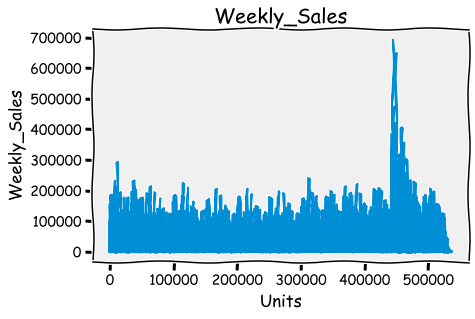

In [91]:
#Plotting the weekly sales
plots(walmart_df['Weekly_Sales'],'Units','Weekly_Sales','Weekly_Sales')

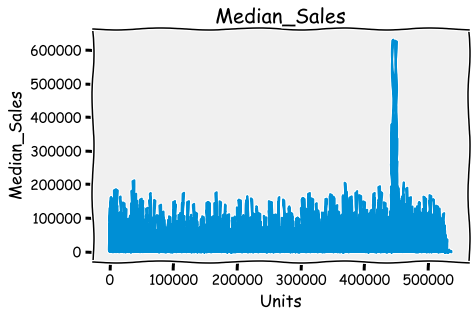

In [92]:
#Plotting the median sales.
plots(walmart_df['Median_Sales'],'Units','Median_Sales','Median_Sales')

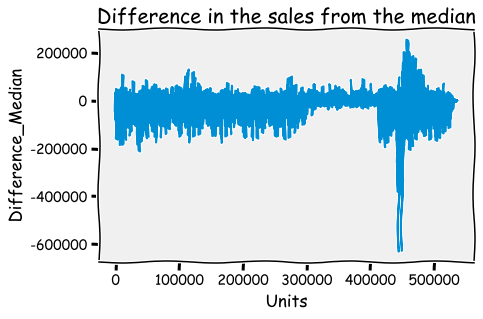

In [93]:
#Plotting the sales from the median.
plots(walmart_df['Difference_Median'],'Units','Difference_Median','Difference in the sales from the median')

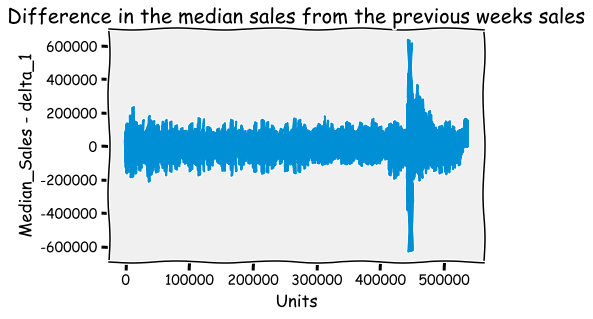

In [94]:
#Plotting the difference of previous 1 week sale from the median sales.
plots(walmart_df['delta_1']-walmart_df['Median_Sales'],'Units','Median_Sales - delta_1','Difference in the median sales from the previous weeks sales')

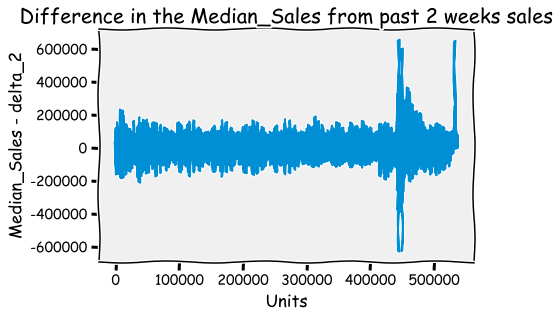

In [95]:
#Plotting the difference of previous 2 week sales from the median sales.
plots(walmart_df['delta_2']-walmart_df['Median_Sales'],'Units','Median_Sales - delta_2','Difference in the Median_Sales from past 2 weeks sales')

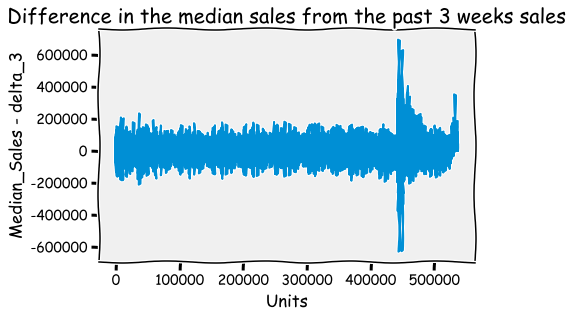

In [96]:
#Plotting the difference of previous 3 week sales from the median sales.
plots(walmart_df['delta_3']-walmart_df['Median_Sales'],'Units','Median_Sales - delta_3','Difference in the median sales from the past 3 weeks sales')

<h3>Modelling the weekly sales directly is quite hard.</h3>

<h3>We will rather model the difference in the sales from the median.</h3>

<h3>The differences has a nice distribution. Hence, it is easier to model. </h3>

<h3>While we are modelling the differences , we need to mostly focus on the direction rather than the magnitude </h3>

In [97]:
#Listing the columns in the dataframe.
walmart_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Super_Bowl',
       'Labor_Day', 'Thanksgiving', 'Christmas', 'delta_1', 'delta_2',
       'delta_3', 'Year', 'Month', 'Day', 'Median_Sales', 'Difference_Median',
       'MarkDown1_indicator', 'MarkDown2_indicator', 'MarkDown3_indicator',
       'MarkDown4_indicator', 'MarkDown5_indicator'],
      dtype='object')

<h1> Modelling </h1>

<h2>1.) Linear Regression </h2>

<h3><b>Encoding the categorical variables.</b></h3>

In [98]:
#Storing the categories
categories = ['Store','Dept','IsHoliday','Type','Super_Bowl','Labor_Day','Thanksgiving','Christmas','MarkDown1_indicator','MarkDown2_indicator','MarkDown3_indicator','MarkDown4_indicator','MarkDown5_indicator']
columns = list(walmart_df.columns)

#Storing the names of the numerical variables
numeric = []
for i in columns:
    if i not in categories and i!='Date' and i!='Difference_Median' and i!='Median_Sales':
        numeric.append(i)

#Creating an dictionary to store the one-hot encoding of the categories
temp_dict={}
for i in categories:
    temp_dict[i] = pd.get_dummies(walmart_df[i])

#Storing it for future purpose.
temp_dict['numeric'] = walmart_df[numeric]
temp_dict['Date'] = walmart_df['Date']
temp_dict['IsHoliday'] = walmart_df['IsHoliday']
temp_dict['Difference_Median'] = walmart_df['Difference_Median']
temp_dict['Median_Sales'] = walmart_df['Median_Sales']
temp_dict['Store'] = walmart_df['Store']
temp_dict['Dept'] = walmart_df['Dept']
temp_dict['Date'] = walmart_df['Date']
temp_dict['IsHoliday'] = walmart_df['IsHoliday']

#Sorting and concatenating the dataframes.
lin_reg_walmart_df = pd.concat([temp_dict[i] for i in temp_dict.keys()],axis=1)
lin_reg_walmart_df.sort_values('Date',inplace=True,ignore_index=True)

<h3> Normalizing the independent numeric variables </h3>

In [99]:
#Normalizing the numerical variables.
for i in numeric:
    mean = lin_reg_walmart_df[i].mean()
    std = lin_reg_walmart_df[i].std()
    lin_reg_walmart_df[i]-=mean
    lin_reg_walmart_df[i]/=std

<h3>Splitting the dataset into train and test </h3>

In [100]:
#Selecting the records for test data
test = lin_reg_walmart_df[lin_reg_walmart_df['Date']>=pd.to_datetime('2012-11-02')]

#Selecting the records for train data
train = lin_reg_walmart_df[lin_reg_walmart_df['Date']<pd.to_datetime('2012-11-02')]

In [101]:
#Displaying the dataframe.
train.head()

Store  Dept IsHoliday  A  B  C  0  1  0  1  ...      Size   delta_1  \
0      1     1     False  1  0  0  0  1  1  0  ...  0.239911  0.584266   
1     40     2     False  1  0  0  0  1  1  0  ...  0.301674  0.262712   
2     12    46     False  0  1  0  0  1  1  0  ... -0.400614 -0.592460   
3     40     3     False  1  0  0  0  1  1  0  ...  0.301674  0.686523   
4      3    24     False  0  1  0  0  1  1  0  ... -1.627443 -0.107419   

    delta_2   delta_3      Year     Month       Day       Date  \
0  0.584260  0.584259 -1.301883 -1.288377 -1.214359 2010-02-05   
1 -0.166830  0.406543 -1.301883 -1.288377 -1.214359 2010-02-05   
2 -0.288738 -0.319294 -1.301883 -1.288377 -1.214359 2010-02-05   
3  0.262707 -0.166831 -1.301883 -1.288377 -1.214359 2010-02-05   
4 -0.380087 -0.534999 -1.301883 -1.288377 -1.214359 2010-02-05   

   Difference_Median  Median_Sales  
0           4029.510     20894.990  
1           1514.360     25575.020  
2           -826.010     30054.520  
3           1201.395      5067.745  
4            129.915      2451.425  

[5 rows x 44 columns]

In [102]:
#Dependent variable
y_train = train['Difference_Median']
y_test = test['Difference_Median']
train_isholiday = train['IsHoliday']

#Dropping the irrelevant attributes.
train.drop(['Weekly_Sales','Difference_Median','Date','IsHoliday','Store','Dept'],axis=1,inplace=True)
test.drop(['Weekly_Sales','Difference_Median'],axis=1,inplace=True)

<h2><b>Hyperparameter Tuning using Random Search with Cross-Validation</b></h2>

In [103]:
#Routine to visualize the hyperparameter tuning results.
def visualize(random):
    dictionary = random.cv_results_
    dictionary.pop('params')
    return pd.DataFrame(dictionary)

In [104]:
#Importing the RandomizedSearchCV from the sklearn module
from sklearn.model_selection import RandomizedSearchCV
# alpha : Regularization parameter
alpha = [x for x in np.linspace(start = 0, stop = 1, num = 30)]

random_grid = {'alpha': alpha}

#Printing the random_grid
print(random_grid)

{'alpha': [0.0, 0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.24137931034482757, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.48275862068965514, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207, 0.9655172413793103, 1.0]}


In [105]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.linear_model import Ridge
ridge_random = Ridge()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
ridge_random = RandomizedSearchCV(estimator = ridge_random, param_distributions = random_grid, n_iter = 75 , cv = 2, verbose= 2, random_state= 42, n_jobs = 3)
# Fit the random search model
ridge_random.fit(train,y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:    7.6s finished


RandomizedSearchCV(cv=2, estimator=Ridge(), n_iter=75, n_jobs=3,
                   param_distributions={'alpha': [0.0, 0.034482758620689655,
                                                  0.06896551724137931,
                                                  0.10344827586206896,
                                                  0.13793103448275862,
                                                  0.1724137931034483,
                                                  0.20689655172413793,
                                                  0.24137931034482757,
                                                  0.27586206896551724,
                                                  0.3103448275862069,
                                                  0.3448275862068966,
                                                  0.3793103448275862,
                                                  0.41379310344827586,
                                                  0.4482758620689655,
           

In [106]:
#Calling the visualize routine
visualize(ridge_random)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.876355  0.000000e+00         0.054672    7.810354e-03           0   
1        0.290222  5.679536e-02         0.063989    9.134531e-03   0.0344828   
2        0.218702  2.145767e-06         0.046861    2.861023e-06   0.0689655   
3        0.223629  4.928231e-03         0.052176    5.307674e-03    0.103448   
4        0.219595  1.097071e-02         0.054675    7.810354e-03    0.137931   
5        0.224381  5.681157e-03         0.042252    4.611850e-03    0.172414   
6        0.225125  4.277110e-03         0.042581    4.278302e-03    0.206897   
7        0.218703  5.960464e-07         0.046862    4.768372e-07    0.241379   
8        0.219741  1.663208e-02         0.046851    1.537800e-05    0.275862   
9        0.208574  1.217675e-02         0.054680    7.813692e-03    0.310345   
10       0.210889  7.811427e-03         0.054677    7.808447e-03    0.344828   
11       0.212591  6.108761e-03         0.058681    3.806472e-03     0.37931   
12       0.212591  9.513140e-03         0.039055    7.809877e-03    0.413793   
13       0.210890  7.810473e-03         0.050034    3.168344e-03    0.448276   
14       0.213107  9.273529e-03         0.045403    1.462698e-03    0.482759   
15       0.210753  7.677078e-03         0.046864    1.072884e-06    0.517241   
16       0.221352  2.650738e-03         0.045887    9.752512e-04    0.551724   
17       0.222054  1.788139e-06         0.046862    1.668930e-06    0.586207   
18       0.212035  8.960843e-03         0.055354    4.440546e-03     0.62069   
19       0.222234  2.815723e-03         0.046861    1.549721e-06    0.655172   
20       0.216238  1.143384e-02         0.046863    1.072884e-06    0.689655   
21       0.210906  7.797718e-03         0.046863    2.694130e-05    0.724138   
22       0.204819  1.741529e-03         0.064227    1.737833e-03    0.758621   
23       0.220442  1.742005e-03         0.046860    1.311302e-06    0.793103   
24       0.218699  9.536743e-07         0.046864    1.192093e-07    0.827586   
25       0.215109  5.009770e-03         0.044062    2.801538e-03    0.862069   
26       0.219410  7.094145e-04         0.046879    1.406670e-05    0.896552   
27       0.218702  1.192093e-06         0.051911    5.048990e-03    0.931034   
28       0.220546  2.264977e-06         0.046862    2.145767e-06    0.965517   
29       0.210890  7.811904e-03         0.039053    7.809758e-03           1   

    split0_test_score  split1_test_score  mean_test_score  std_test_score  \
0           -0.087648      -3.736183e+17    -1.868092e+17    1.868092e+17   
1           -0.089532      -4.421712e-02    -6.687473e-02    2.265762e-02   
2           -0.089531      -4.421608e-02    -6.687354e-02    2.265747e-02   
3           -0.089530      -4.421504e-02    -6.687235e-02    2.265731e-02   
4           -0.089528      -4.421400e-02    -6.687117e-02    2.265716e-02   
5           -0.089527      -4.421297e-02    -6.686998e-02    2.265701e-02   
6           -0.089526      -4.421193e-02    -6.686879e-02    2.265686e-02   
7           -0.089524      -4.421089e-02    -6.686760e-02    2.265671e-02   
8           -0.089523      -4.420986e-02    -6.686641e-02    2.265656e-02   
9           -0.089522      -4.420882e-02    -6.686522e-02    2.265640e-02   
10          -0.089520      -4.420778e-02    -6.686403e-02    2.265625e-02   
11          -0.089519      -4.420675e-02    -6.686285e-02    2.265610e-02   
12          -0.089518      -4.420571e-02    -6.686166e-02    2.265595e-02   
13          -0.089516      -4.420467e-02    -6.686047e-02    2.265580e-02   
14          -0.089515      -4.420363e-02    -6.685928e-02    2.265565e-02   
15          -0.089514      -4.420260e-02    -6.685809e-02    2.265549e-02   
16          -0.089512      -4.420156e-02    -6.685690e-02    2.265534e-02   
17          -0.089511      -4.420052e-02    -6.685572e-02    2.265519e-02   
18          -0.089510      -4.419949e-02    -6.685453e-02   

In [107]:
#Printing the best parameters
print("The best parameters are ",ridge_random.best_params_)

The best parameters are  {'alpha': 1.0}


In [108]:
#Printing the best estimator.
print('The best estimator ',ridge_random.best_estimator_)

The best estimator  Ridge()


In [109]:
#Printing the best estimator and fitting on the train data
best_estimator = ridge_random.best_estimator_
best_estimator.fit(train,y_train)

Ridge()

In [110]:
#Saving the estimator using the dump method from joblib
joblib.dump(best_estimator, "./models/best_linreg.joblib")

['./models/best_linreg.joblib']

In [111]:
#Loading the saved estimator from the drive.
best_estimator = joblib.load("./models/best_linreg.joblib")

In [112]:
#This routine calculates the custom metric given in the Kaggle website
def custom_metric(train_isholiday,x,y,estimator):
    a=np.ones(shape=(x.shape[0]))
    a=a*(train_isholiday==True)*4+1 #Gives a weight of 5 if holiday and 1 if not
    y_hat = estimator.predict(x)+x['Median_Sales']
    #Plotting our predicted weekly sales.
    plt.plot(y_hat+x['Median_Sales'],color='r',label='Predicted')
    plt.plot(y,color='g',label='Truth')
    plt.xlabel('Weeks')
    plt.ylabel('Predicted weekly sales')
    plt.title('Estimated Weekly Sales')
    plt.legend()
    plt.show()
    #Calculating the weighted mean absolute deviation
    diff = np.abs(y-y_hat)
    diff = diff*a
    diff = np.sum(diff)
    normalize = 1/(np.sum(a))
    diff = diff*normalize
    return diff

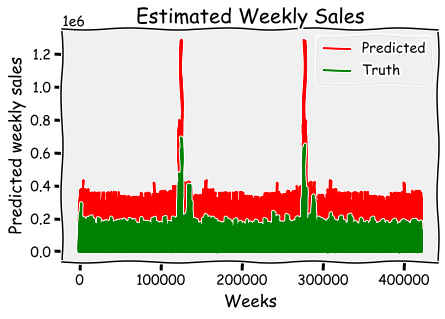

The score on the train set  1795.988906587761


In [113]:
#Printing the score on the train set
print("The score on the train set ",custom_metric(train_isholiday,train,y_train+train['Median_Sales'],best_estimator))

<h1> Inference </h1>

In [114]:
def inference(estimator,test,filename):
    #Reading the test.csv from the disk.
    t = pd.read_csv('test.csv')
    #We are reordering the test data with the submission file.
    test.sort_values(by=['Date','Store','Dept'],inplace=True,ignore_index=True)
    t['Date'] = pd.to_datetime(t['Date'])
    v = pd.merge(t,test,on=['Store','Dept','Date','IsHoliday'],how='inner')
    v.drop(['Date','Store','Dept','IsHoliday'],axis=1,inplace=True)
    #Predicting the weekly sales for the test data.
    y_test = best_estimator.predict(v)
    #Adding the Median_Sales to the dependent variable.
    Y = np.array(y_test)
    Y += np.array(v['Median_Sales'])
    #Concatenating the columns.This is the expected format for this competition.
    t['Id'] = t['Store'].astype(str)+'_'+t['Dept'].astype(str)+'_'+t['Date'].astype(str)
    #Adding the predicted weekly sales.
    t['Weekly_Sales'] = Y
    #Dropping the unnecessary columns.
    t.drop(['Store','Dept','Date','IsHoliday'],axis=1,inplace=True)
    #Writing it to a csv file.
    t.to_csv('submission/'+filename,columns=['Id','Weekly_Sales'],index=False)
    #Plotting our predicted weekly sales.
    plt.plot(Y)
    plt.xlabel('Weeks')
    plt.ylabel('Predicted weekly sales')
    plt.title('Estimated Weekly Sales')
    plt.show()

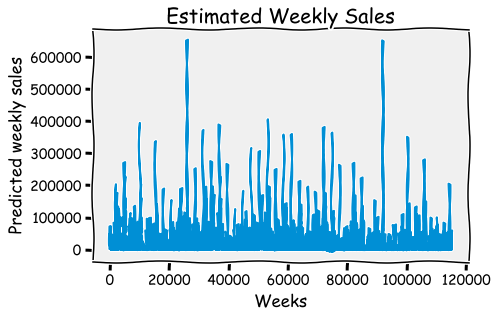

In [115]:
inference(best_estimator,test,'walmart_df_lin.csv')

<h1> The final score </h1>

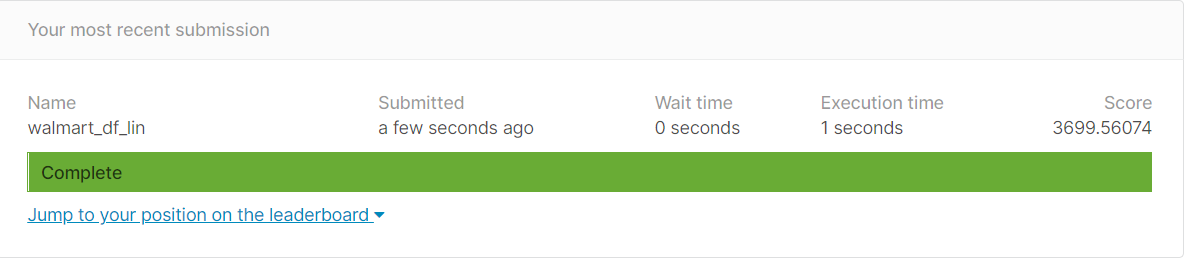

<h1><b>Random Forest Regression</b></h1>

<h2>Encoding the categorical variable(s) </h2>

In [116]:
#We are encoding the Type attribute using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

walmart_df['Type'] = le.fit_transform(walmart_df['Type'])

<h3> Splitting the dataset into train and test </h3>

In [117]:
#Selecting the records for test data
test = walmart_df[walmart_df['Date']>=pd.to_datetime('2012-11-02')]

In [118]:
#Selecting the records for train data
train = walmart_df[walmart_df['Date']<pd.to_datetime('2012-11-02')]

In [119]:
#Printing the length of the dataset (train/test)
print("Length of the training dataset ",len(train))
print("Length of the test dataset ",len(test))

Length of the training dataset  421570
Length of the test dataset  115064


In [120]:
#Printing the dataframe
train.head()

Store  Dept       Date  Weekly_Sales IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50     False        42.31       2.572   
1      1     1 2010-02-19      41595.55     False        39.93       2.514   
2      1     1 2010-02-26      19403.54     False        46.63       2.561   
3      1     1 2011-02-04      21665.76     False        42.27       2.989   
4      1     1 2011-02-18      46845.87     False        57.36       3.045   

   MarkDown1  MarkDown2  MarkDown3  ...  Year  Month  Day  Median_Sales  \
0        0.0        0.0        0.0  ...  2010      2    5      20894.99   
1        0.0        0.0        0.0  ...  2010      2   19      20894.99   
2        0.0        0.0        0.0  ...  2010      2   26      20894.99   
3        0.0        0.0        0.0  ...  2011      2    4      20894.99   
4        0.0        0.0        0.0  ...  2011      2   18      20894.99   

   Difference_Median  MarkDown1_indicator  MarkDown2_indicator  \
0            4029.51                    1                    1   
1           20700.56                    1                    1   
2           -1491.45                    1                    1   
3             770.77                    1                    1   
4           25950.88                    1                    1   

   MarkDown3_indicator  MarkDown4_indicator  MarkDown5_indicator  
0                    1                    1                    1  
1                    1                    1                    1  
2                    1                    1                    1  
3                    1                    1                    1  
4                    1                    1                    1  

[5 rows x 33 columns]

In [121]:
#Printing the dataframe
test.head()

Store  Dept       Date  Weekly_Sales IsHoliday  Temperature  Fuel_Price  \
9       1     1 2013-02-01           0.0     False        56.46       3.244   
10      1     1 2013-02-15           0.0     False        49.66       3.475   
11      1     1 2013-02-22           0.0     False        50.25       3.597   
21      1     2 2013-02-01           0.0     False        56.46       3.244   
22      1     2 2013-02-15           0.0     False        49.66       3.475   

    MarkDown1  MarkDown2  MarkDown3  ...  Year  Month  Day  Median_Sales  \
9     9290.91    1359.90     265.00  ...  2013      2    1     20894.990   
10   72937.29    6665.52      47.21  ...  2013      2   15     20894.990   
11   20107.75    3163.89      42.20  ...  2013      2   22     20894.990   
21    9290.91    1359.90     265.00  ...  2013      2    1     46497.185   
22   72937.29    6665.52      47.21  ...  2013      2   15     46497.185   

    Difference_Median  MarkDown1_indicator  MarkDown2_indicator  \
9          -20894.990                    0                    0   
10         -20894.990                    0                    0   
11         -20894.990                    0                    0   
21         -46497.185                    0                    0   
22         -46497.185                    0                    0   

    MarkDown3_indicator  MarkDown4_indicator  MarkDown5_indicator  
9                     0                    0                    0  
10                    0                    0                    0  
11                    0                    0                    0  
21                    0                    0                    0  
22                    0                    0                    0  

[5 rows x 33 columns]

In [122]:
#Making the Difference_Median attribute as the dependent variable
y_train = train['Difference_Median']

In [123]:
#Making the Difference_Median attribute as the dependent variable
y_test = test['Difference_Median']

In [124]:
#Dropping the irrelevant attributes.
train.drop(['Weekly_Sales','Difference_Median','Date'],axis=1,inplace=True)
test.drop(['Weekly_Sales','Difference_Median'],axis=1,inplace=True)

<h2><b>Hyperparameter Tuning using Random Search with Cross-Validation</b></h2>

In [125]:
#This routine creates a dataframe from the results of the hyperparameter tuning
def visualize(random_object):
    dictionary = random_object.cv_results_
    dictionary.pop('params')
    return pd.DataFrame(dictionary)

In [126]:
#Importing the RandomizedSearchCV from the sklearn module
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 4)]
n_estimators.insert(0,200)
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 55, num = 4)]
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split':[2]}
#Printing the random_grid
print(random_grid)

{'n_estimators': [200, 10, 40, 70, 100], 'max_depth': [10, 25, 40, 55], 'min_samples_split': [2]}


In [127]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 6, cv = 2, verbose= 2, random_state= 42, n_jobs = 3)
# Fit the random search model
rf_random.fit(train,y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed: 23.7min finished


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=6, n_jobs=3,
                   param_distributions={'max_depth': [10, 25, 40, 55],
                                        'min_samples_split': [2],
                                        'n_estimators': [200, 10, 40, 70, 100]},
                   random_state=42, verbose=2)

In [128]:
#Calling the visualize routine
visualize(rf_random)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     271.658694      8.244224         2.876373        0.352720   
1     126.210607      0.874983         2.570402        0.343179   
2     627.658155      1.474591        11.606699        1.702728   
3      13.787762      0.508782         0.417256        0.025414   
4     192.478814      5.108161         3.700286        0.424872   
5     518.026084      2.056194         9.050067        0.739506   

  param_n_estimators param_min_samples_split param_max_depth  \
0                200                       2              10   
1                 40                       2              55   
2                200                       2              55   
3                 10                       2              10   
4                 70                       2              25   
5                200                       2              25   

   split0_test_score  split1_test_score  mean_test_score  std_test_score  \
0           0.102996           0.031467         0.067231        0.035764   
1           0.107925           0.040698         0.074311        0.033613   
2           0.116282           0.052768         0.084525        0.031757   
3           0.075849           0.027042         0.051445        0.024403   
4           0.109226           0.048784         0.079005        0.030221   
5           0.117513           0.051497         0.084505        0.033008   

   rank_test_score  
0                5  
1                4  
2                1  
3                6  
4                3  
5                2

In [129]:
#Printing the best parameters
print("The best parameters are ",rf_random.best_params_)

The best parameters are  {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 55}


In [130]:
#Printing the best estimator.
print('The best estimator ',rf_random.best_estimator_)

The best estimator  RandomForestRegressor(max_depth=55, n_estimators=200)


In [131]:
#Printing the best estimator and fitting on the train data
best_estimator = rf_random.best_estimator_
best_estimator.fit(train,y_train)

RandomForestRegressor(max_depth=55, n_estimators=200)

In [132]:
#Saving the estimator using the dump method from joblib
joblib.dump(best_estimator, "./models/best_rf.joblib")

['./models/best_rf.joblib']

In [ ]:
#Loading the saved estimator from the drive.
best_estimator = joblib.load("./best_rf.joblib")

In [133]:
#This routine calculates the custom metric given in the Kaggle website
def custom_metric(x,y,estimator):
    a=np.ones(shape=(x.shape[0]))
    a=a*(x['IsHoliday']==True)*4+1 #Gives a weight of 5 if holiday and 1 if not
    y_hat = estimator.predict(x)+x['Median_Sales']
    #Plotting our predicted weekly sales.
    plt.plot(y_hat+x['Median_Sales'],color='r',label='Predicted')
    plt.plot(y,color='g',label='Truth')
    plt.xlabel('Weeks')
    plt.ylabel('Predicted weekly sales')
    plt.title('Estimated Weekly Sales')
    plt.legend()
    plt.show()
    #Calculating the weighted mean absolute deviation
    diff = np.abs(y-y_hat)
    diff = diff*a
    diff = np.sum(diff)
    normalize = 1/(np.sum(a))
    diff = diff*normalize
    return diff

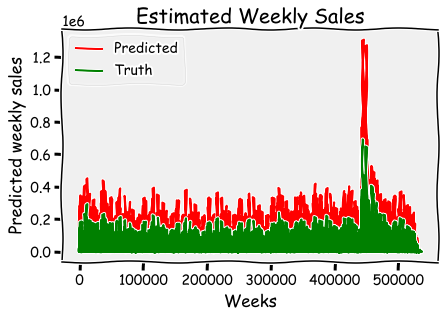

The score on the train set  409.4722052599005


In [134]:
#Printing the score on the train set
print("The score on the train set ",custom_metric(train,y_train+train['Median_Sales'],best_estimator))

<h1> Inference </h1>

In [162]:
def inference(estimator,test,filename):
    #Reading the test.csv from the disk.
    t = pd.read_csv('test.csv')
    #We are reordering the test data with the submission file.
    test.sort_values(by=['Date','Store','Dept'],inplace=True,ignore_index=True)
    t['Date'] = pd.to_datetime(t['Date'])
    v = pd.merge(t,test,on=['Store','Dept','Date','IsHoliday'],how='inner')
    v.drop('Date',inplace=True,axis=1)
    v['IsHoliday'] = v['IsHoliday'].astype(bool)
    #Predicting the weekly sales for the test data.
    y_test = best_estimator.predict(v)
    #Adding the Median_Sales to the dependent variable.
    Y = np.array(y_test)
    Y += np.array(v['Median_Sales'])
    #Concatenating the columns.This is the expected format for this competition.
    t['Id'] = t['Store'].astype(str)+'_'+t['Dept'].astype(str)+'_'+t['Date'].astype(str)
    #Adding the predicted weekly sales.
    t['Weekly_Sales'] = Y
    #Dropping the unnecessary columns.
    t.drop(['Store','Dept','Date','IsHoliday'],axis=1,inplace=True)
    #Writing it to a csv file.
    t.to_csv('submission/'+filename,columns=['Id','Weekly_Sales'],index=False)
    #Plotting our predicted weekly sales.
    plt.plot(Y)
    plt.xlabel('Weeks')
    plt.ylabel('Predicted weekly sales')
    plt.title('Estimated Weekly Sales')
    plt.show()

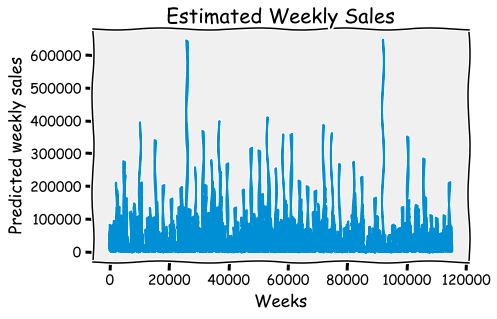

In [136]:
inference(best_estimator,test,'walmart_df_rf.csv')

<h1> The final score </h1>

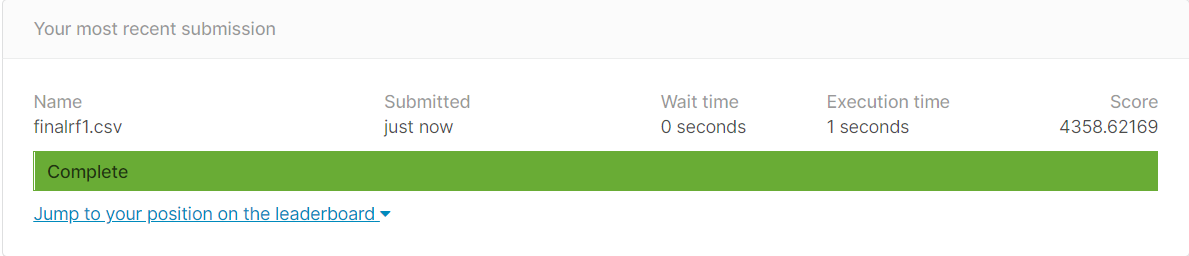

<h1> XgBoost Regression </h1>

<h2>Splitting the dataset into train and test </h2>

In [163]:
#Selecting the records for test data
test = walmart_df[walmart_df['Date']>=pd.to_datetime('2012-11-02')]
#Selecting the records for train data
train = walmart_df[walmart_df['Date']<pd.to_datetime('2012-11-02')]

In [164]:
#Xgboost expects it to be of boolean.
train['IsHoliday'] = train['IsHoliday'].astype(bool)

In [165]:
#Dropping the irrelevant attributes.
train.drop(['Weekly_Sales','Difference_Median','Date'],axis=1,inplace=True)
test.drop(['Weekly_Sales','Difference_Median'],axis=1,inplace=True)

<h2><b>Hyperparameter Tuning using Random Search with Cross-Validation</b></h2>

In [139]:
#Importing the RandomizedSearchCV from the sklearn module
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [40,100,140,180,200]
# Maximum number of levels in tree
max_depth = [None,10,25,55,70]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate':[0.1,0.01,0.001]}
#Printing the random_grid
print(random_grid)

{'n_estimators': [40, 100, 140, 180, 200], 'max_depth': [None, 10, 25, 55, 70], 'learning_rate': [0.1, 0.01, 0.001]}


In [140]:
#This routine creates a dataframe from the results of the hyperparameter tuning
def visualize_xgb(random_object):
    dictionary = random_object.cv_results_ #Using the cv_results_ attribute to retrieve the results in a dictionary.
    columns = ['mean_fit_time','std_fit_time','mean_score_time','std_score_time','n_estimators','max_depth','learning_rate','split0_test_score','split1_test_score','mean_test_score','std_test_score','rank_test_score']
    d={}
    negate = [4,5,6] #The values in the keys are not needed.
    for i in range(0,12):
        if i not in negate:
            d[columns[i]] = dictionary[columns[i]] #We are extracting the results from the cv_results_ dictionary.
    d[columns[4]]=np.array([i['n_estimators'] for i in dictionary['params']])
    d[columns[5]]=np.array([i['max_depth'] for i in dictionary['params']])
    d[columns[6]]=np.array([i['learning_rate'] for i in dictionary['params']])
   
    return pd.DataFrame(d) #Converting it into a dataframe for nicer visualization.

In [143]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from xgboost import XGBRegressor
xgb = XGBRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 8, cv = 2, verbose= 2, n_jobs = 3)
# Fit the random search model
xgb_random.fit(train,y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  16 out of  16 | elapsed: 28.3min finished


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

In [144]:
#Calling the visualize routine
visualize_xgb(xgb_random)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     533.681139      8.208465        26.395499        2.656119   
1     875.292275     62.579072        40.179498        3.666868   
2     106.598725      3.929200         4.522388        0.570182   
3      37.312479      0.033180         1.577743        0.093742   
4      73.780697      1.089807         2.030792        0.093717   
5      15.851635      0.422338         0.640464        0.015608   
6     420.887489      9.554244        37.306480        0.983259   
7     219.907399      5.748352        13.740725        0.048863   

   split0_test_score  split1_test_score  mean_test_score  std_test_score  \
0           0.018525          -0.002145         0.008190        0.010335   
1          -0.013620           0.011782        -0.000919        0.012701   
2           0.021694           0.032031         0.026862        0.005169   
3           0.180171           0.058818         0.119495        0.060677   
4          -0.013410           0.000993        -0.006209        0.007201   
5          -0.063892          -0.021371        -0.042632        0.021261   
6           0.019504           0.012895         0.016199        0.003304   
7           0.019246           0.012886         0.016066        0.003180   

   rank_test_score  n_estimators max_depth  learning_rate  
0                5           100        55          0.100  
1                6           200        55          0.001  
2                2            40        25          0.010  
3                1           100      None          0.100  
4                7           200      None          0.001  
5                8            40      None          0.001  
6                3           200        25          0.100  
7                4           100        25          0.100

In [145]:
#Printing the best parameters
print("The best parameters are ",xgb_random.best_params_)

The best parameters are  {'n_estimators': 100, 'max_depth': None, 'learning_rate': 0.1}


In [146]:
#Printing the best estimator.
print('The best estimator ',xgb_random.best_estimator_)

The best estimator  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [147]:
#Printing the best estimator and fitting on the train data
best_estimator = xgb_random.best_estimator_
best_estimator.fit(train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

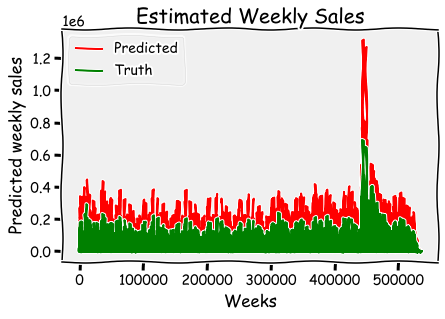

The score on the train set  1326.744511935029


In [148]:
#Printing the score on the train set
print("The score on the train set ",custom_metric(train,y_train+train['Median_Sales'],best_estimator))

In [149]:
#Saving the estimator using the dump method from joblib
joblib.dump(best_estimator, "./models/best_xgb.joblib")

['./models/best_xgb.joblib']

In [150]:
#Loading the saved estimator from the drive.
best_estimator = joblib.load("./models/best_xgb.joblib")

<h1> Inference </h1>

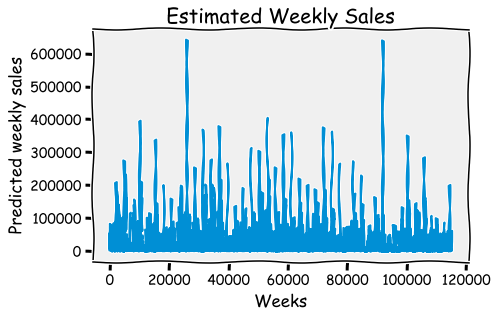

In [166]:
inference(best_estimator,test,'walmart_df_xgb.csv')

<h1> The final score </h1>

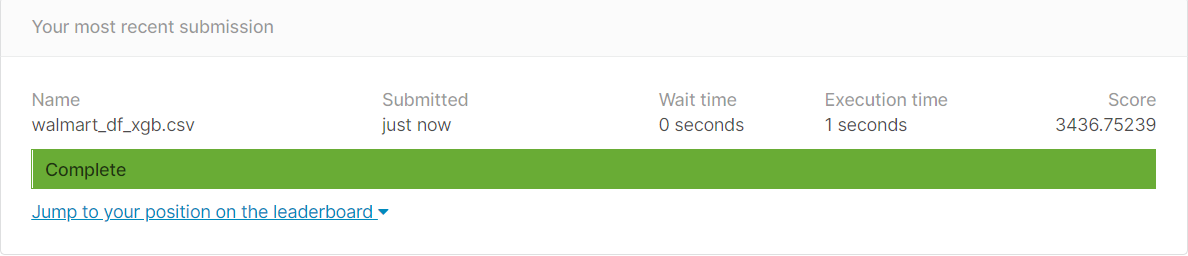